# 1. File Preperation 

In [1]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import pearsonr


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [3]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [4]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [5]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

data_helpful = data[data['helpful_vote'] != 0]


# 2. Statistic of features

First of all we want to look at different features that could be extracted from the review data. Therefore I built some functions for easier data handling and statistical analysis of the features. 

## Functions for Building Summary statistic 

In [6]:
# Convert Sentiment_Classification to Numerical
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Map the sentiment column to numerical values
data_helpful['Sentiment'] = data_helpful['Sentiment_Classification'].map(sentiment_mapping)
data['Sentiment'] = data['Sentiment_Classification'].map(sentiment_mapping)

data_utilitarian['Sentiment'] = data_utilitarian['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic['Sentiment'] = data_hedonic['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic_raw['Sentiment'] = data_hedonic_raw['Sentiment_Classification'].map(sentiment_mapping)
data_utilitarian_raw['Sentiment'] = data_utilitarian_raw['Sentiment_Classification'].map(sentiment_mapping)

In [7]:
# Function for building summary statistics for numerical columns

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ['helpful_ratio','rating', 'Sentiment', 'subjective_score', 'word_count', 
                         'sent_count', 'sent_length', 'title_length', 'review_ext', 
                         '#adj', '#adv', '#nouns', 'elap_days', 'image', 'FRE']

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'median', 'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transposing the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

In [8]:
# Only calculate for the mean of the numerical columns

def calculate_mean(df, groupby_column):
    # Group by the specified column and calculate aggregate statistics
    summary_mean = df.groupby(groupby_column).agg({
        'helpful_ratio': ['mean'],  # Calculate the mean of the 'helpful_ratio' column
        'rating': ['mean'],
        'review_ext': ['mean'],
        'Sentiment': ['mean'],
        'subjective_score': ['mean'],
        'word_count': ['mean'],
        'sent_count': ['mean'],
        'sent_length': ['mean'],
        'title_length': ['mean'],
        'FRE': ['mean'],
        '#adj': ['mean'],
        '#adv': ['mean'],
        '#nouns': ['mean'],
        'elap_days': ['mean'],
    })

    # Flatten the MultiIndex columns
    summary_mean.columns = ['_'.join(col).strip() for col in summary_mean.columns.values]

    # Transpose the DataFrame
    summary_mean = summary_mean.transpose()

    return summary_mean

### Summary Statistic of Helpful Reviews

In the following, a straightforward statistical analysis is conducted without graphical representation, focusing on various factors such as product type or main category.

In [9]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')

prod_type                        0            1
helpful_ratio_mean        0.001361     0.001243
rating_mean               2.763785     3.832505
review_ext_mean          -1.853574    -0.757831
Sentiment_mean            0.777400     1.388751
subjective_score_mean     0.776553     0.822067
word_count_mean          64.234513    53.893412
sent_count_mean           4.148741     3.866377
sent_length_mean         17.176330    15.519439
title_length_mean         1.269231     1.361405
FRE_mean                 78.763465    83.127085
#adj_mean                 0.093711     0.098915
#adv_mean                 0.080119     0.071189
#nouns_mean               0.189479     0.182510
elap_days_mean         1095.019741  1656.220323


In [10]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'main_category')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Category_mean.csv')

main_category           Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean        0.001441     0.000849     0.001296    0.001427   
rating_mean               2.476945     4.029299     2.738172    3.104137   
review_ext_mean          -2.223055    -0.511635    -1.895334   -1.395863   
Sentiment_mean            0.546110     1.485775     0.815943    0.921541   
subjective_score_mean     0.782660     0.822641     0.770538    0.783746   
word_count_mean          65.724784    50.067516    76.683085   35.358060   
sent_count_mean           4.582133     3.705732     4.500972    2.944365   
sent_length_mean         16.680019    15.415137    18.657825   14.406705   
title_length_mean         1.276657     1.264544     1.244329    1.316690   
FRE_mean                 76.810620    83.340144    77.264563   83.996106   
#adj_mean                 0.077548     0.101336     0.088839    0.120437   
#adv_mean                 0.071440     0.073082     0.081790    0.085033   
#nouns_mean 

In [11]:
# Summary of data after helpful reviews
summary_help_hedonic = calculate_mean(data_hedonic, 'product')

# Display the DataFrame
print(summary_help_hedonic)

# Saving to CSV
summary_help_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Hedonic_mean.csv')

product                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean         0.000719    0.002427     0.001037     0.002217
rating_mean                4.125809    2.788835     3.890041     3.758315
review_ext_mean           -0.374191   -1.854369    -0.709959    -1.041685
Sentiment_mean             1.513300    0.936893     1.446058     1.294900
subjective_score_mean      0.827764    0.834365     0.815249     0.807833
word_count_mean           49.456506   59.092233    50.949170    69.121951
sent_count_mean            3.653487    4.555825     3.781120     4.075388
sent_length_mean          14.895422   14.342856    16.165057    17.138913
title_length_mean          1.258807    1.771845     1.272822     1.492239
FRE_mean                  82.821280   83.102015    84.088838    82.037450
#adj_mean                  0.099294    0.102463     0.104282     0.083032
#adv_mean                  0.072097    0.068645     0.074505     0.063625
#nouns_mean                0.183141   

In [12]:
# Summary of data after helpful reviews
summary_help_ut = calculate_mean(data_utilitarian, 'product')

# Display the DataFrame
print(summary_help_ut)

# Saving to CSV
summary_help_ut.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Utilitarian_mean.csv')

product                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean        0.000975     0.001441      0.001934      0.001427
rating_mean               2.823587     2.476945      2.568665      3.104137
review_ext_mean          -1.776413    -2.223055     -2.131335     -1.395863
Sentiment_mean            0.801170     0.546110      0.845261      0.921541
subjective_score_mean     0.758146     0.782660      0.795130      0.783746
word_count_mean          56.302144    65.724784    117.129594     35.358060
sent_count_mean           3.787524     4.582133      5.916828      2.944365
sent_length_mean         16.494291    16.680019     22.951416     14.406705
title_length_mean         1.277778     1.276657      1.177950      1.316690
FRE_mean                 78.741764    76.810620     74.333017     83.996106
#adj_mean                 0.087855     0.077548      0.090790      0.120437
#adv_mean                 0.086393     0.071440      0.072656      0.085033
#nouns_mean 

### Analyzing Mean of Review Data

In [13]:
# Calculating Mean for Data after Main category 
summary_mean = calculate_mean(data, 'main_category')

# Display the summary statistics
print(summary_mean)

# Saving to CSV
summary_mean.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Category_mean.csv')

main_category           Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean        0.000192     0.000138     0.000177    0.000551   
rating_mean               3.976762     4.321394     3.864184    3.721058   
review_ext_mean          -0.723238    -0.234736    -0.771454   -0.778942   
Sentiment_mean            1.195698     1.615718     1.298316    1.175854   
subjective_score_mean     0.784201     0.800577     0.778130    0.768247   
word_count_mean          27.000576    26.390550    40.375089   24.408490   
sent_count_mean           2.410793     2.415966     2.864982    2.319735   
sent_length_mean         11.528881    11.825923    14.509245   11.849565   
title_length_mean         1.406952     1.506199     1.317021    1.444873   
FRE_mean                 78.876121    86.893946    80.610742   85.062045   
#adj_mean                 0.125282     0.125501     0.112677    0.137185   
#adv_mean                 0.071905     0.073742     0.088519    0.081863   
#nouns_mean 

In [14]:
# Calculating Mean after Producty Type and Data 
summary_stats_data = calculate_mean(data, 'prod_type')

# Print the summary statistics
print(summary_stats_data)

# Saving to CSV
summary_stats_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType_mean.csv')

prod_type                        0            1
helpful_ratio_mean        0.000219     0.000213
rating_mean               3.882028     4.292919
review_ext_mean          -0.758478    -0.303533
Sentiment_mean            1.256980     1.590106
subjective_score_mean     0.778878     0.801969
word_count_mean          34.987159    27.749720
sent_count_mean           2.681711     2.470676
sent_length_mean         13.397644    11.915999
title_length_mean         1.355281     1.543519
FRE_mean                 80.558422    86.795107
#adj_mean                 0.118693     0.119600
#adv_mean                 0.083132     0.071048
#nouns_mean               0.196290     0.190607
elap_days_mean         1243.600076  1558.759325


In [15]:
# Calculating Mean for hedonic products and product
summary_stats_hedonic = calculate_mean(data_hedonic, 'product')

# Display results
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic_mean.csv')

product                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean         0.000719    0.002427     0.001037     0.002217
rating_mean                4.125809    2.788835     3.890041     3.758315
review_ext_mean           -0.374191   -1.854369    -0.709959    -1.041685
Sentiment_mean             1.513300    0.936893     1.446058     1.294900
subjective_score_mean      0.827764    0.834365     0.815249     0.807833
word_count_mean           49.456506   59.092233    50.949170    69.121951
sent_count_mean            3.653487    4.555825     3.781120     4.075388
sent_length_mean          14.895422   14.342856    16.165057    17.138913
title_length_mean          1.258807    1.771845     1.272822     1.492239
FRE_mean                  82.821280   83.102015    84.088838    82.037450
#adj_mean                  0.099294    0.102463     0.104282     0.083032
#adv_mean                  0.072097    0.068645     0.074505     0.063625
#nouns_mean                0.183141   

In [16]:
# Calculating Mean for utilitarian products and product
summary_stats_utilitarian = calculate_mean(data_utilitarian, 'product')

# Display results
print(summary_stats_utilitarian)

# Saving to CSV
summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian_mean.csv')

product                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean        0.000975     0.001441      0.001934      0.001427
rating_mean               2.823587     2.476945      2.568665      3.104137
review_ext_mean          -1.776413    -2.223055     -2.131335     -1.395863
Sentiment_mean            0.801170     0.546110      0.845261      0.921541
subjective_score_mean     0.758146     0.782660      0.795130      0.783746
word_count_mean          56.302144    65.724784    117.129594     35.358060
sent_count_mean           3.787524     4.582133      5.916828      2.944365
sent_length_mean         16.494291    16.680019     22.951416     14.406705
title_length_mean         1.277778     1.276657      1.177950      1.316690
FRE_mean                 78.741764    76.810620     74.333017     83.996106
#adj_mean                 0.087855     0.077548      0.090790      0.120437
#adv_mean                 0.086393     0.071440      0.072656      0.085033
#nouns_mean 

### Total Analysis (mean, median, variance)

In [17]:
# Summary of hedonic data
summary_stats_hedonic = summary_statistic(data_hedonic_raw, 'product')

# Display the summary statistics
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic.csv')


product                  Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean           0.000157    0.000561     0.000123     0.000410
helpful_ratio_median         0.000000    0.000000     0.000000     0.000000
helpful_ratio_std            0.002301    0.003301     0.002201     0.003729
rating_mean                  4.308369    3.935466     4.331574     4.384584
rating_median                5.000000    5.000000     5.000000     5.000000
rating_std                   1.264015    1.514960     1.228851     1.255547
Sentiment_mean               1.603705    1.367003     1.625107     1.600656
Sentiment_median             2.000000    2.000000     2.000000     2.000000
Sentiment_std                0.751438    0.880247     0.711580     0.729952
subjective_score_mean        0.818202    0.815490     0.786802     0.800379
subjective_score_median      0.908884    0.916730     0.883454     0.902480
subjective_score_std         0.206639    0.227764     0.230703     0.236141
word_count_m

In [18]:
# Summary of utilitarian data
summary_stats_utilitarian = summary_statistic(data_utilitarian_raw, 'product')

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian.csv')

product                      Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean          0.000138     0.000192      0.000249      0.000551
helpful_ratio_median        0.000000     0.000000      0.000000      0.000000
helpful_ratio_std           0.004702     0.004004      0.006970      0.001755
rating_mean                 3.900000     3.976762      3.799502      3.721058
rating_median               5.000000     5.000000      5.000000      5.000000
rating_std                  1.552382     1.572562      1.561097      1.560484
Sentiment_mean              1.285537     1.195698      1.321393      1.175854
Sentiment_median            2.000000     1.000000      2.000000      1.000000
Sentiment_std               0.842058     0.856332      0.889624      0.882790
subjective_score_mean       0.755289     0.784201      0.819381      0.768247
subjective_score_median     0.830232     0.851860      0.885371      0.825344
subjective_score_std        0.233592     0.209121      0.186372 

In [19]:
# Summary of data after Product Type
summary_stats_prodType = summary_statistic(data, 'prod_type')

# Display the DataFrame
print(summary_stats_prodType)

#Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType.csv')

prod_type                          0            1
helpful_ratio_mean          0.000219     0.000213
helpful_ratio_median        0.000000     0.000000
helpful_ratio_std           0.004932     0.002602
rating_mean                 3.882028     4.292919
rating_median               5.000000     5.000000
rating_std                  1.562895     1.279392
Sentiment_mean              1.256980     1.590106
Sentiment_median            2.000000     2.000000
Sentiment_std               0.862466     0.748593
subjective_score_mean       0.778878     0.801969
subjective_score_median     0.850847     0.898295
subjective_score_std        0.215621     0.223715
word_count_mean            34.987159    27.749720
word_count_median          19.000000    16.000000
word_count_std             49.733511    40.344515
sent_count_mean             2.681711     2.470676
sent_count_median           2.000000     2.000000
sent_count_std              2.538221     2.244247
sent_length_mean           13.397644    11.915999


# 3. Correlation Analysis


In [31]:
# Assuming data_utilitarian is your DataFrame
features = ['helpful_ratio', 'rating', 'review_ext', 'Sentiment', 'subj_score', 'elap_days', 'image',
            'ver_purch', 'word_count', 'sent_count', 'sent_length', 'title_length', '#adj', '#adv', '#nouns', 'FRE']

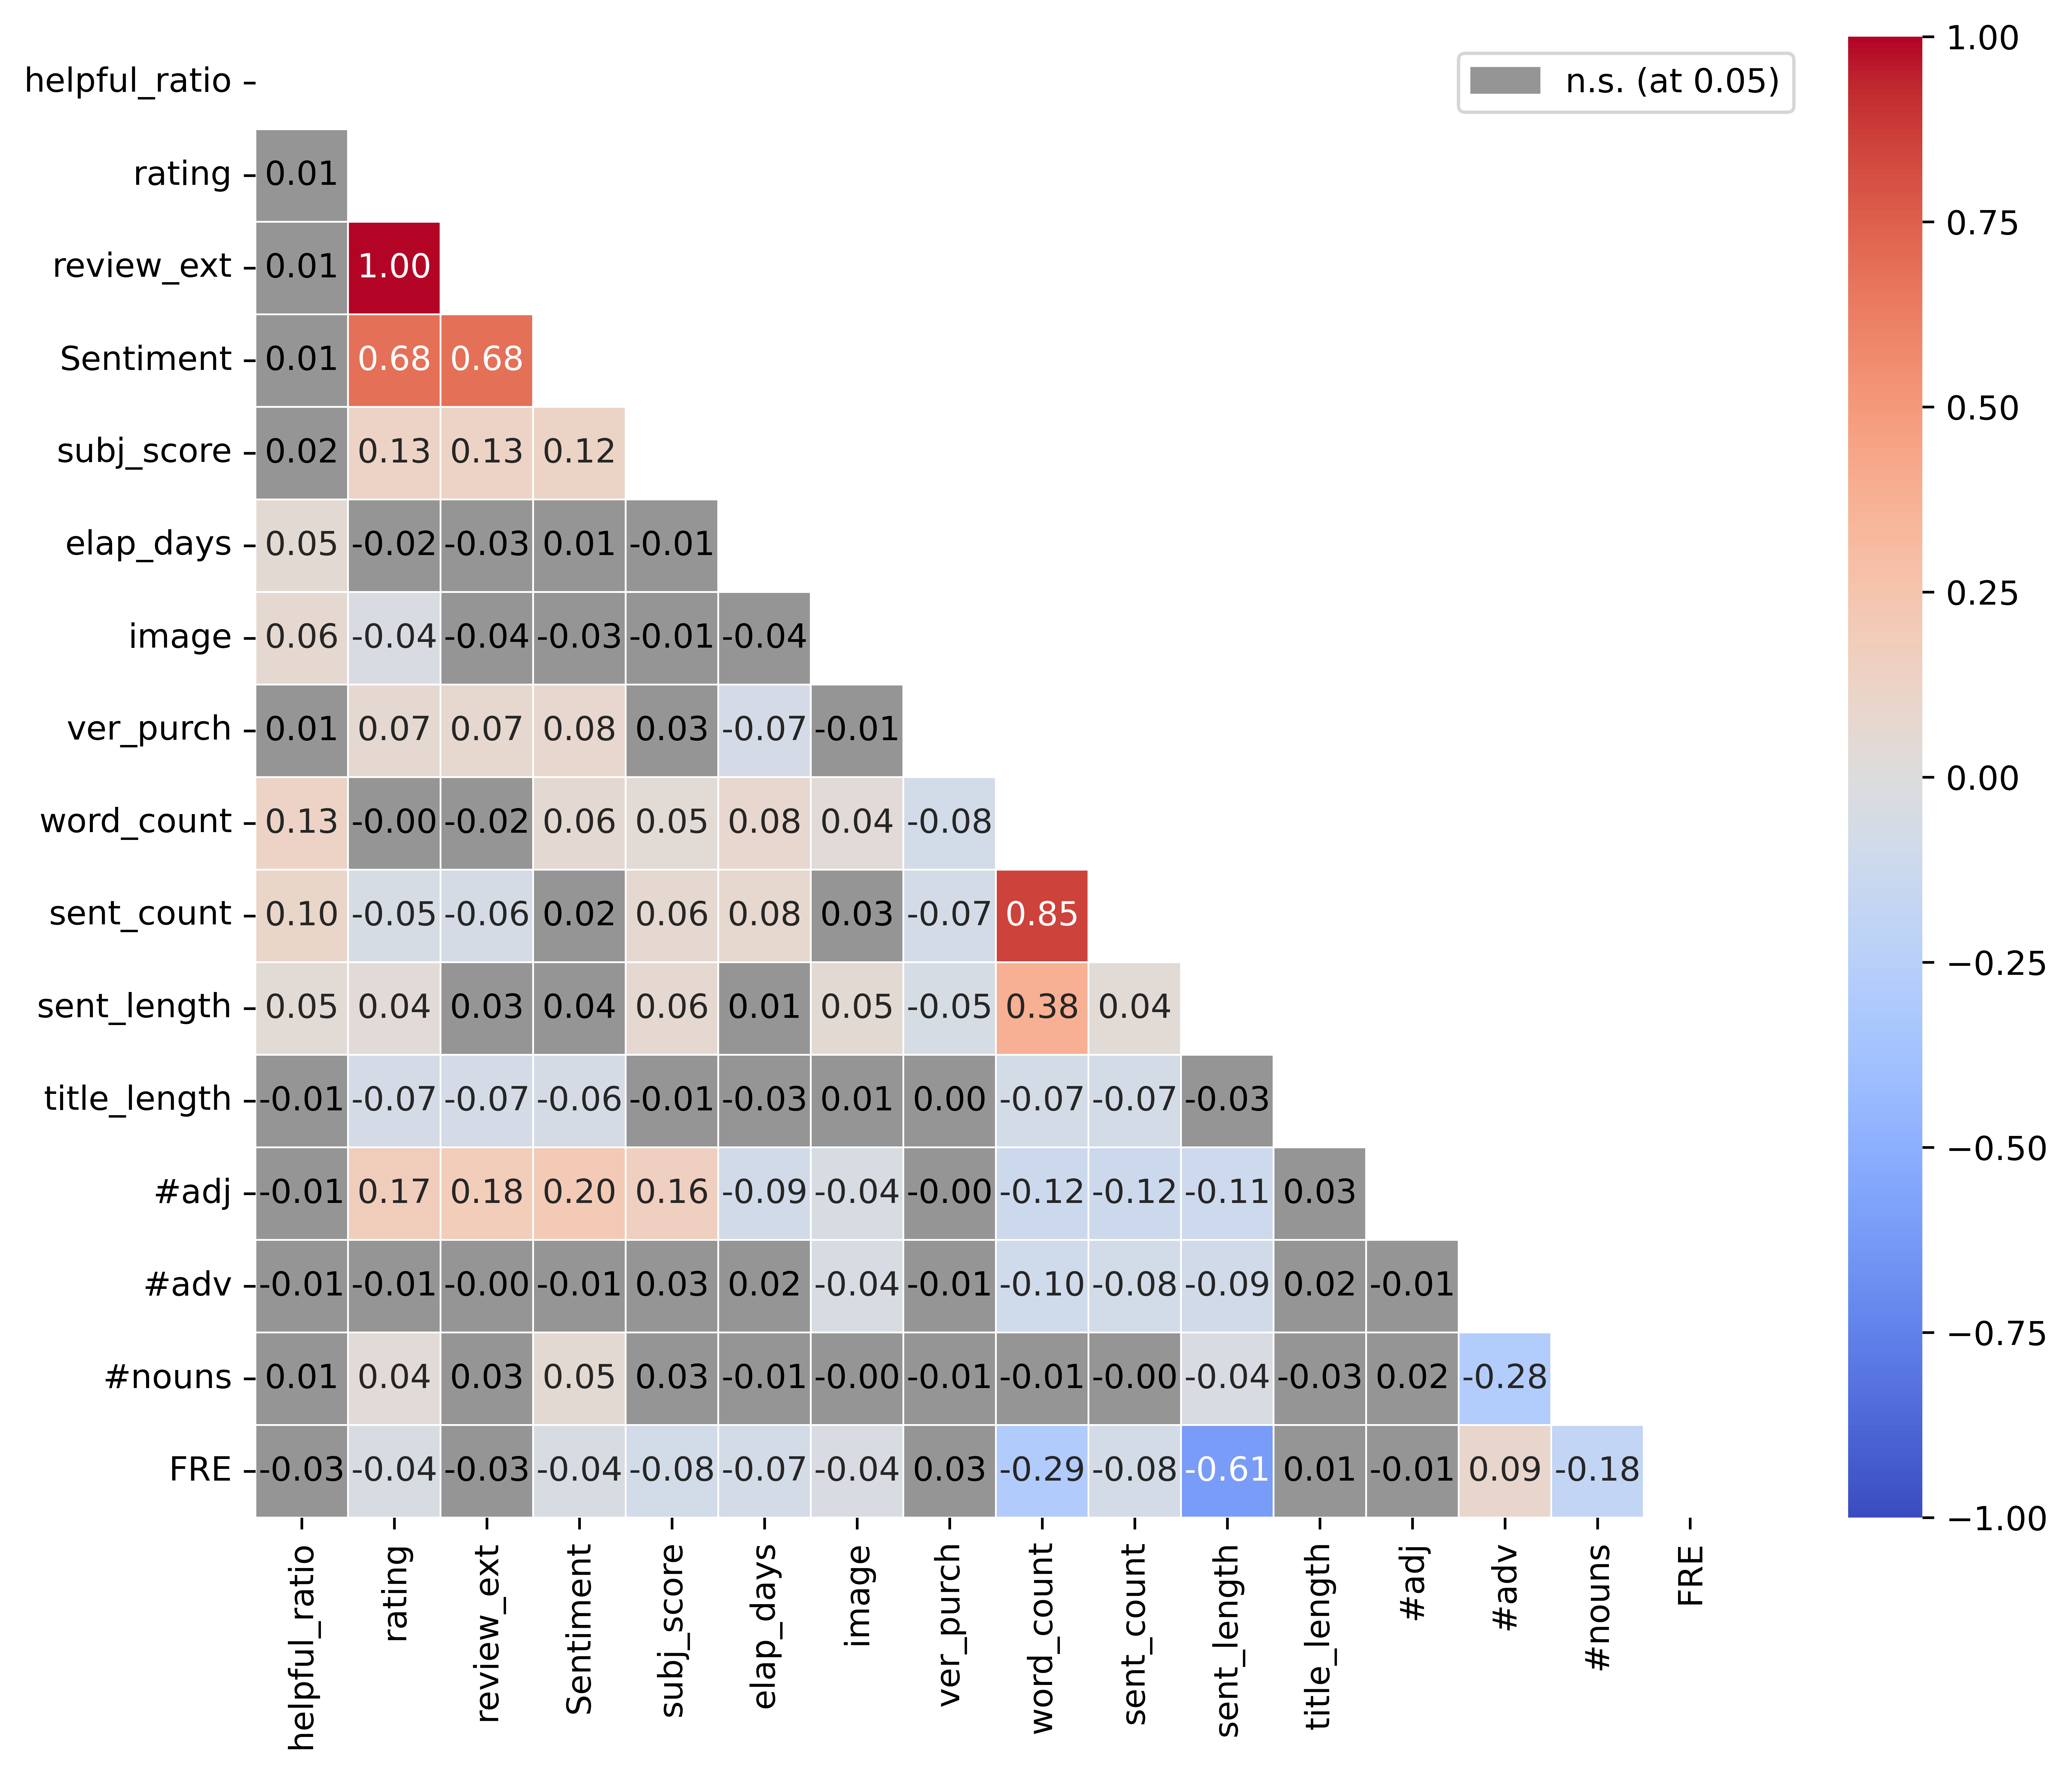

In [32]:

# Calculate correlation matrix for utilitarian data
corr_matrix_uti = data_utilitarian[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_uti.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_utilitarian[features[i]], data_utilitarian[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_uti, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_uti, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_uti, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)

plt.show()

In [33]:
# Calculate correlation matrix
corr_matrix_hed = data_hedonic[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_hed.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_hedonic[features[i]], data_hedonic[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_hed, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_hed, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_hed, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)


plt.show()


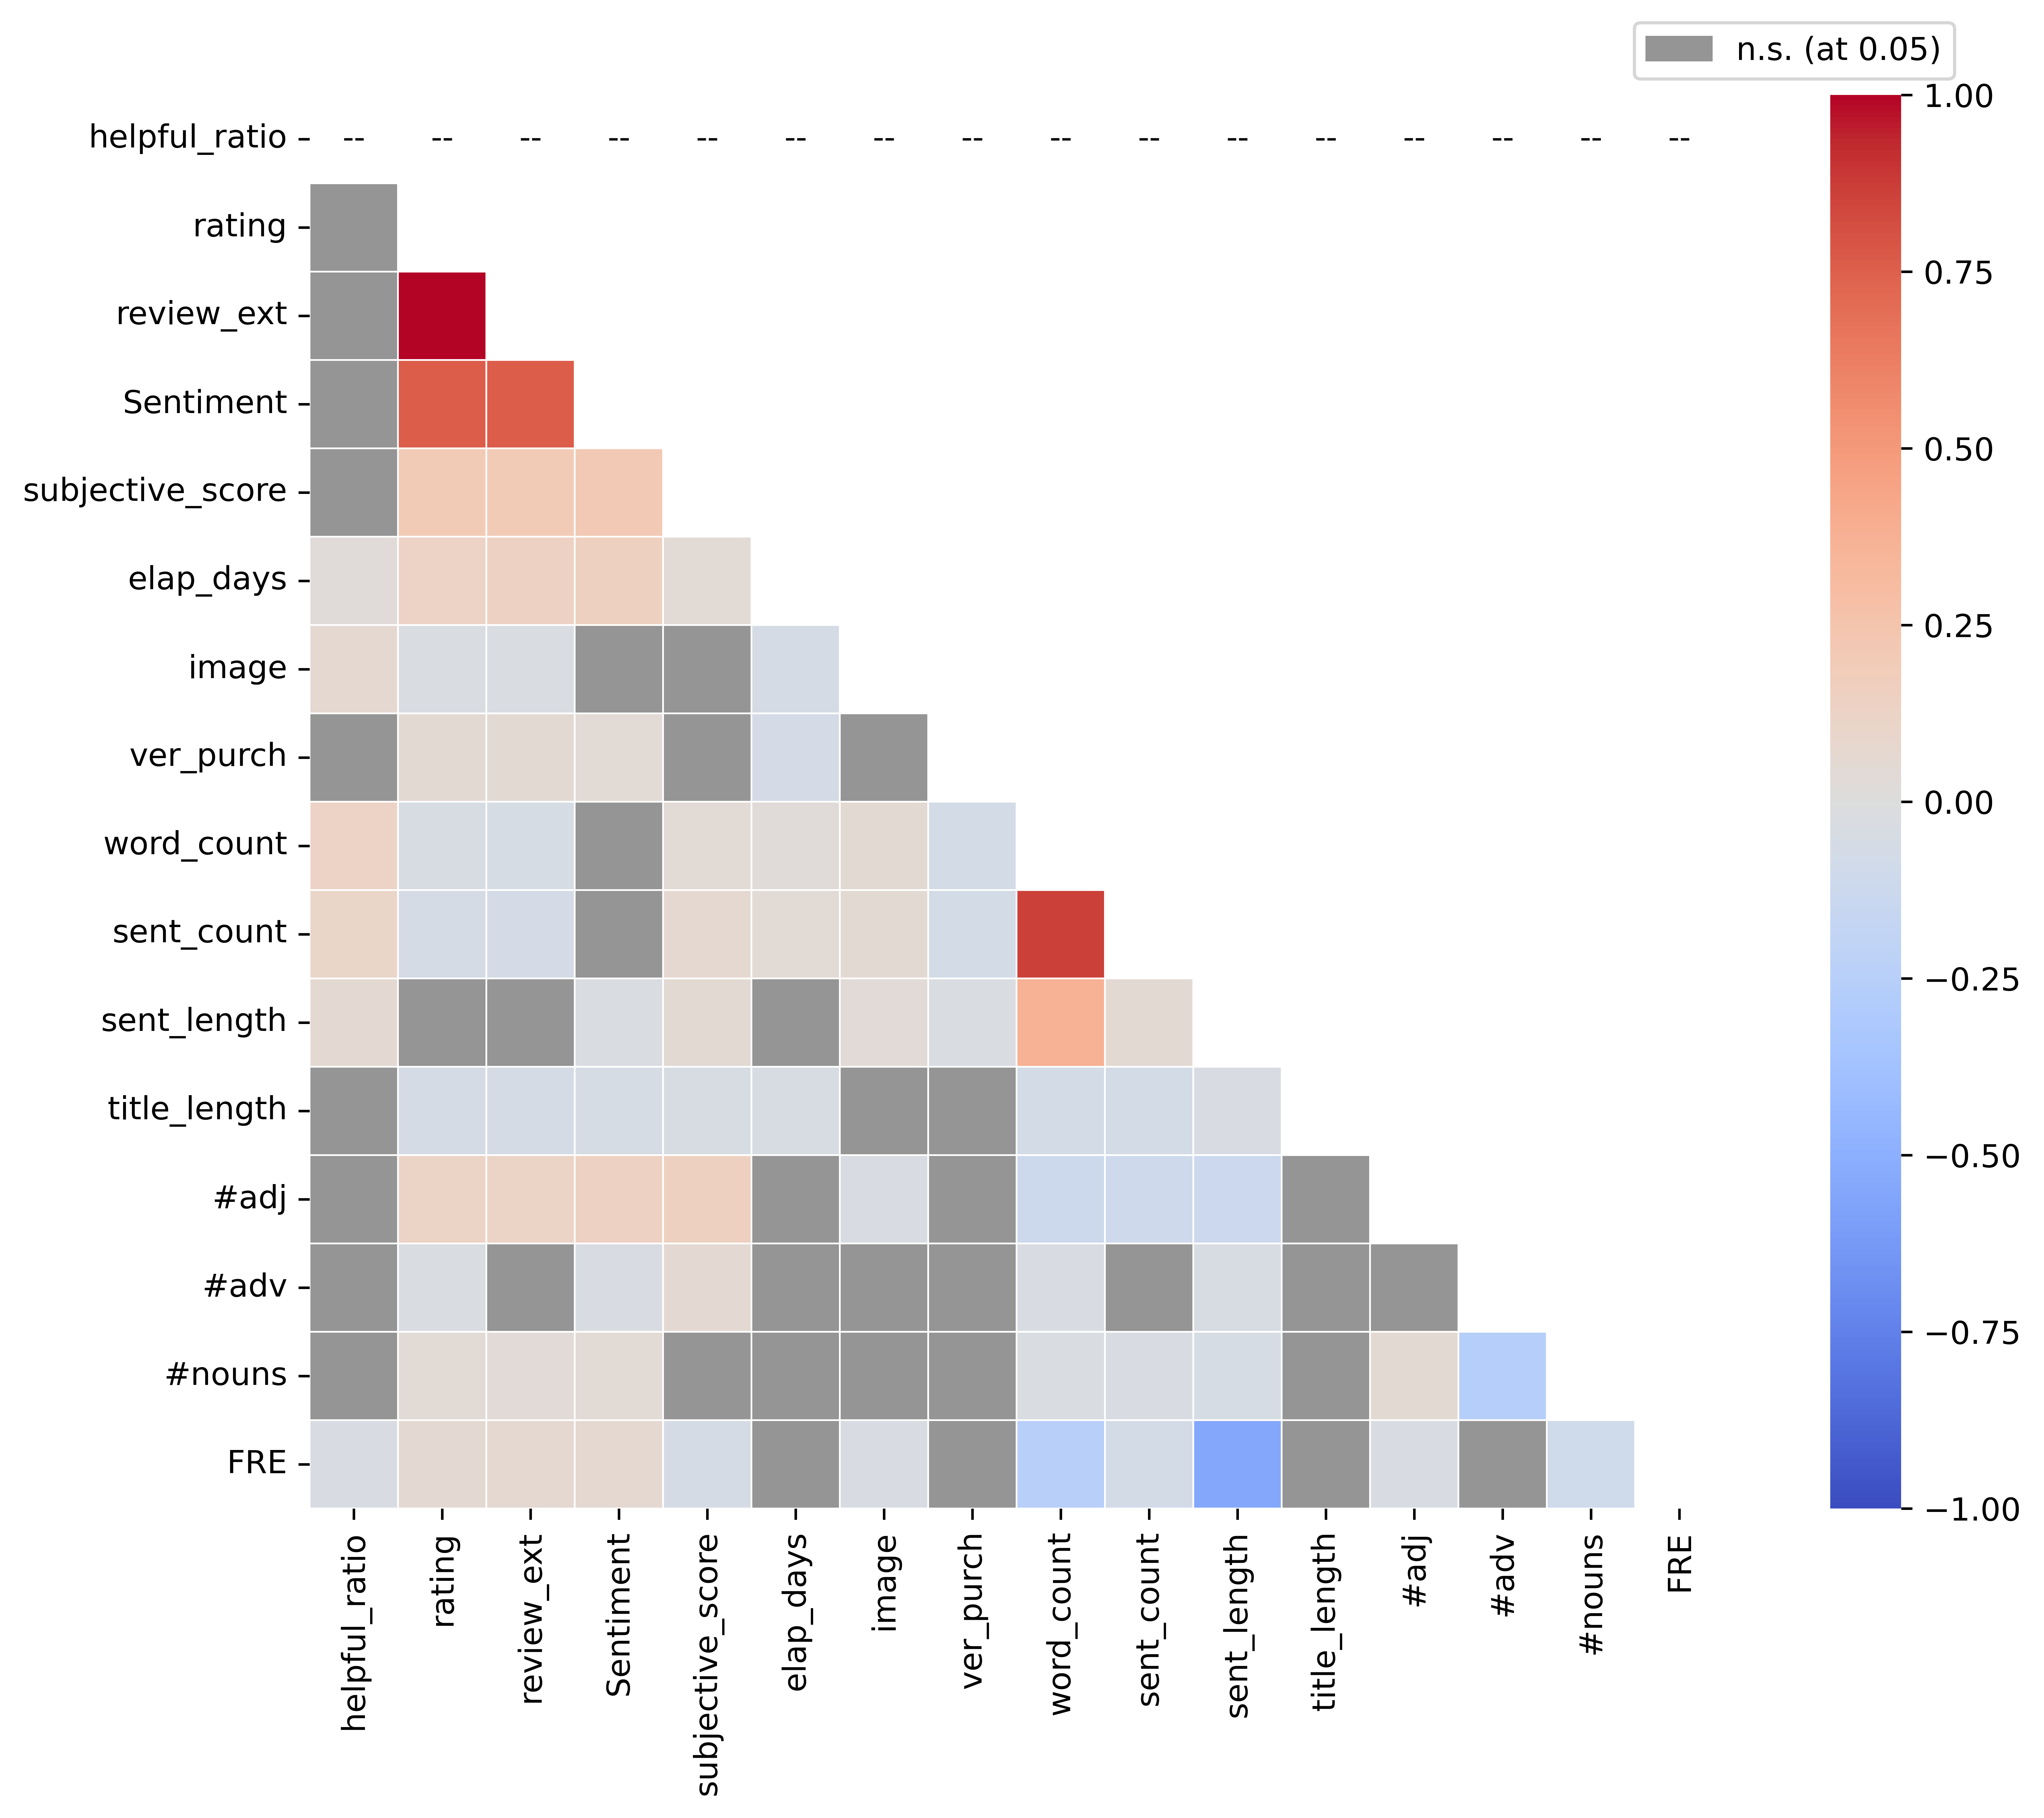

In [ ]:
# Calculate correlation matrix
corr_matrix_total= data_helpful[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_total.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_helpful[features[i]], data_helpful[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_total, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_total, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_total, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc='lower center')


plt.show()

In [ ]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(data_utilitarian['FRE'], data_utilitarian['rating'])

print("Correlation coefficient between sentiment and rating:", correlation)
print("P-value:", p_value)


Correlation coefficient between sentiment and rating: -0.04227300001917306
P-value: 0.02194108883038711


In [ ]:
# Apply log transformation to 'Helpful_ratio'
data_helpful['log_Helpful_ratio'] = np.log(data_helpful['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='word_count', y='log_Helpful_ratio', data=data_helpful)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_helpful['word_count'].corr(data_helpful['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)



Correlation Coefficient: 0.13503872889376972


In [ ]:
# Apply log transformation to 'Helpful_ratio'
data_utilitarian['log_Helpful_ratio'] = np.log(data_utilitarian['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='word_count', y='log_Helpful_ratio', data=data_utilitarian)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_utilitarian['word_count'].corr(data_utilitarian['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.13199348557804438


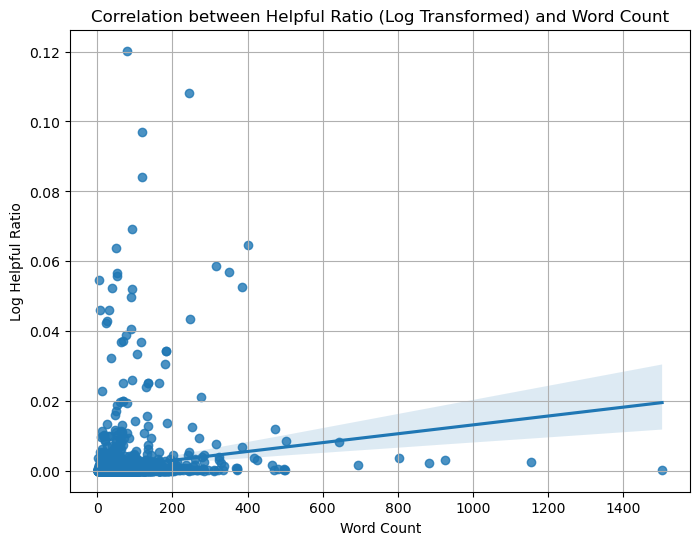

Correlation Coefficient: 0.15178603803275423


In [ ]:
# Apply log transformation to 'Helpful_ratio'
data_hedonic['log_Helpful_ratio'] = np.log(data_hedonic['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='word_count', y='log_Helpful_ratio', data=data_hedonic)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_hedonic['word_count'].corr(data_hedonic['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


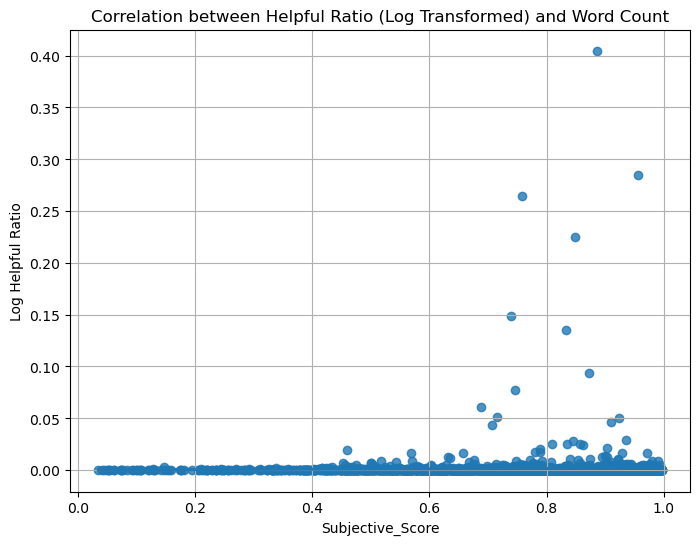

Correlation Coefficient: 0.022347860571557104


In [ ]:
# Apply log transformation to 'Helpful_ratio'
data_utilitarian['log_Helpful_ratio'] = np.log(data_utilitarian['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='subjective_score', y='helpful_ratio', data=data_utilitarian)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Subjective_Score')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_utilitarian['subjective_score'].corr(data_utilitarian['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)

# 4. Graphs and Plots for Data analysis 

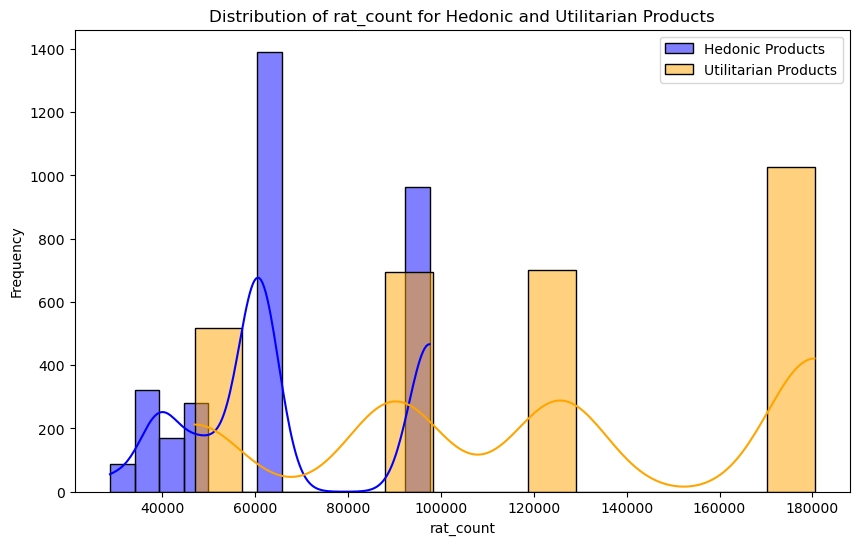

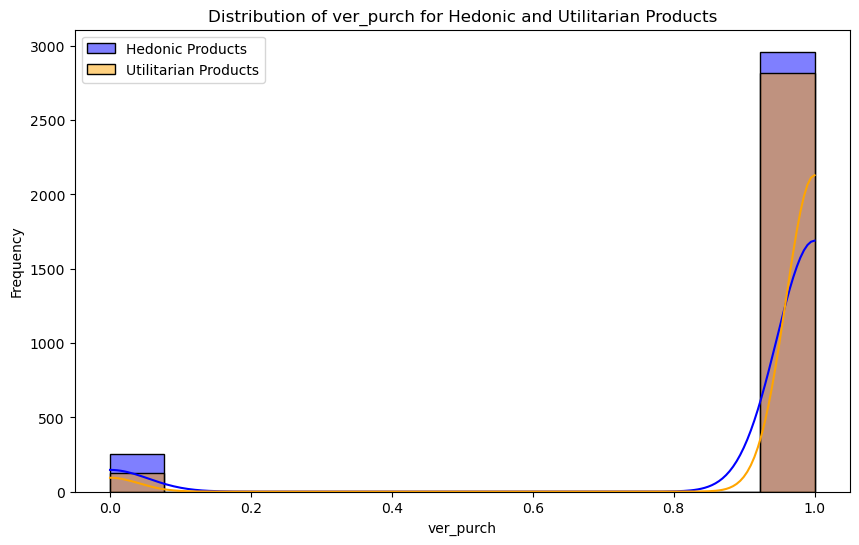

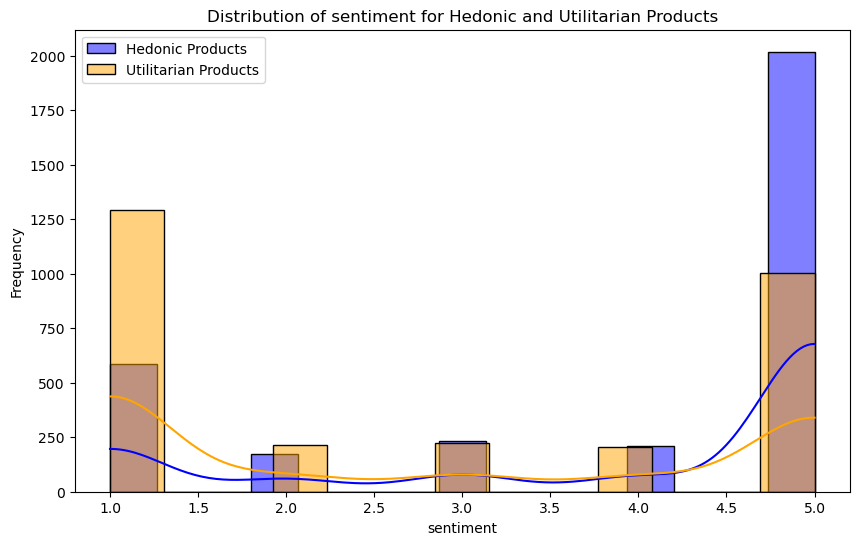

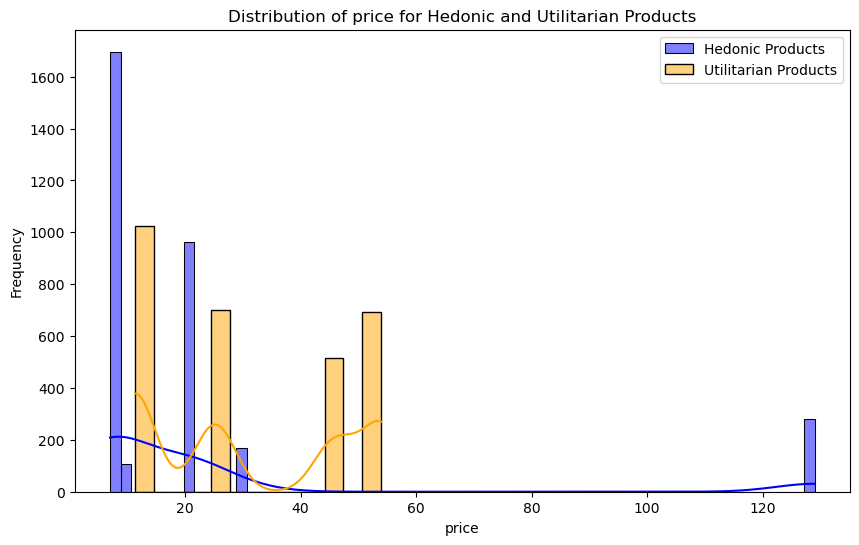

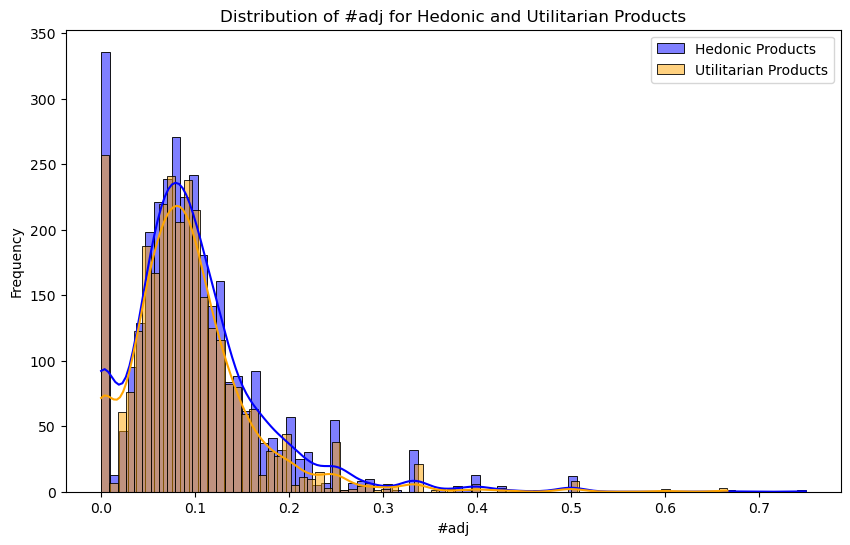

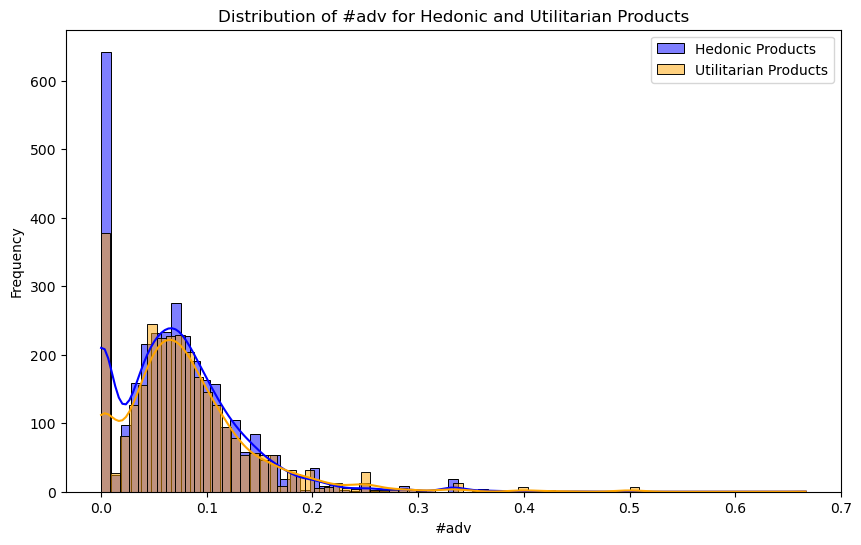

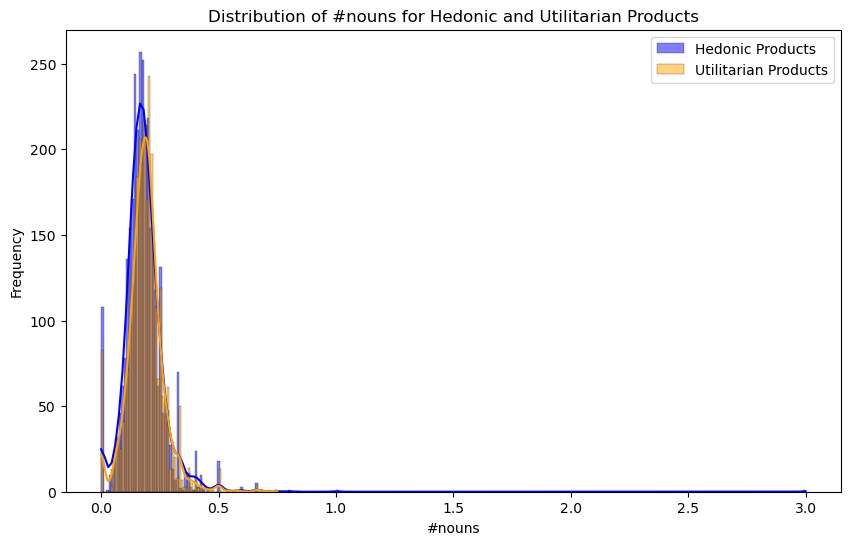

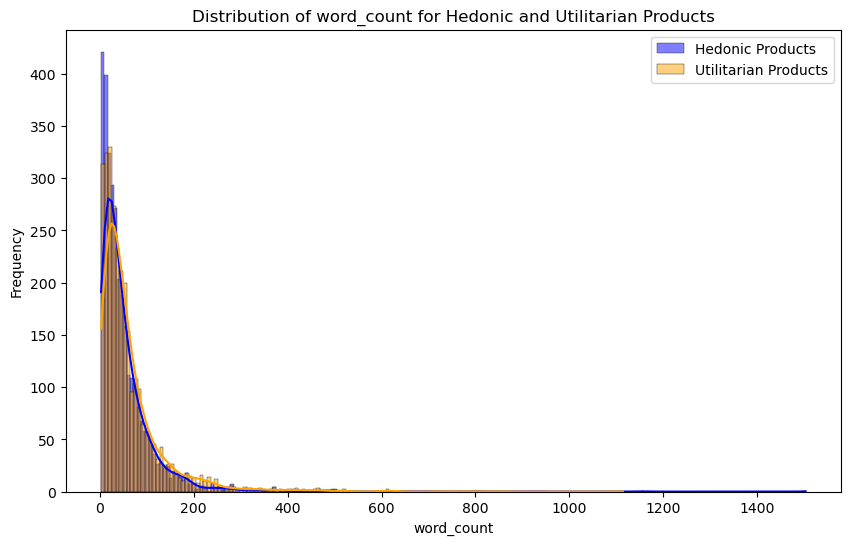

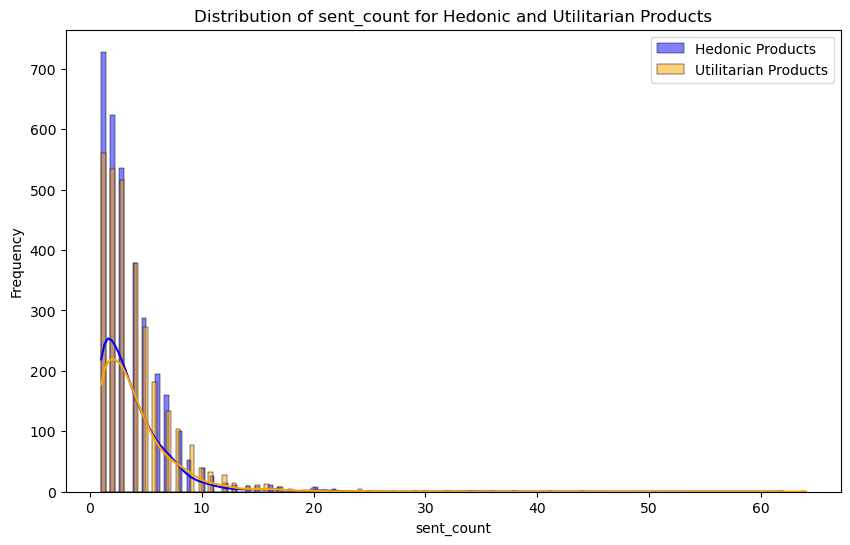

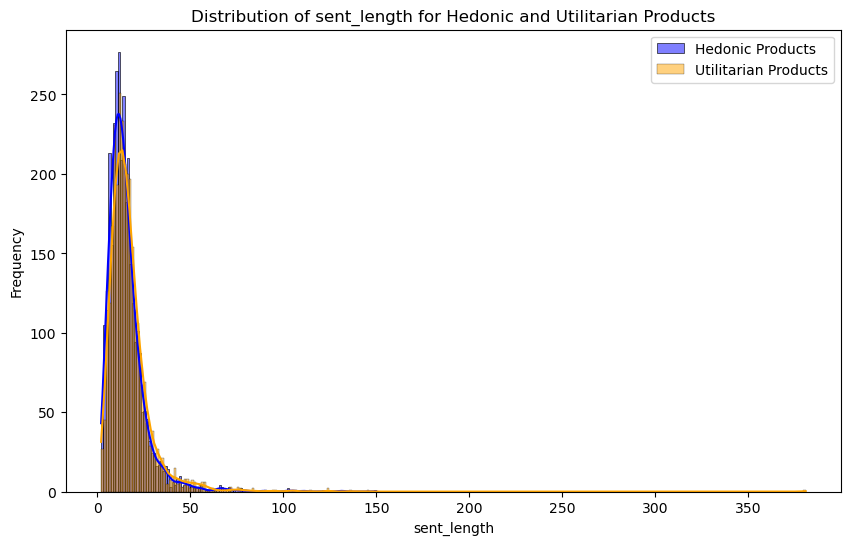

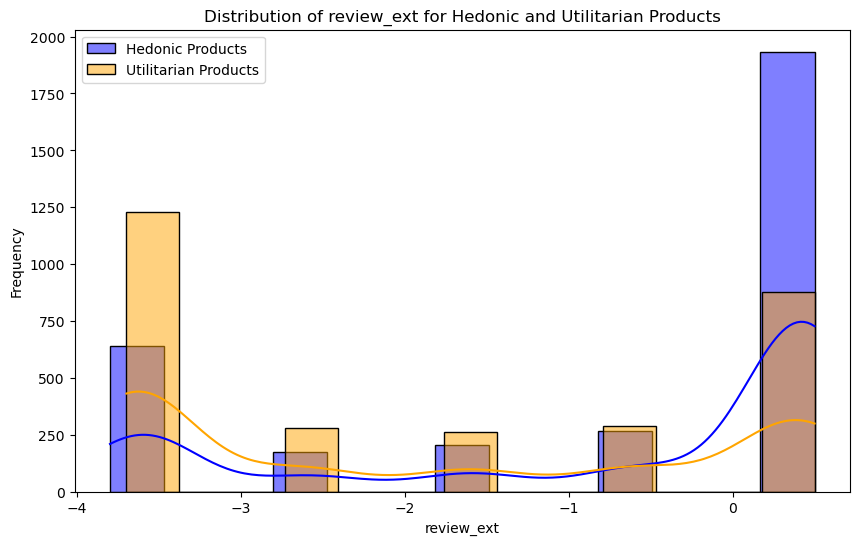

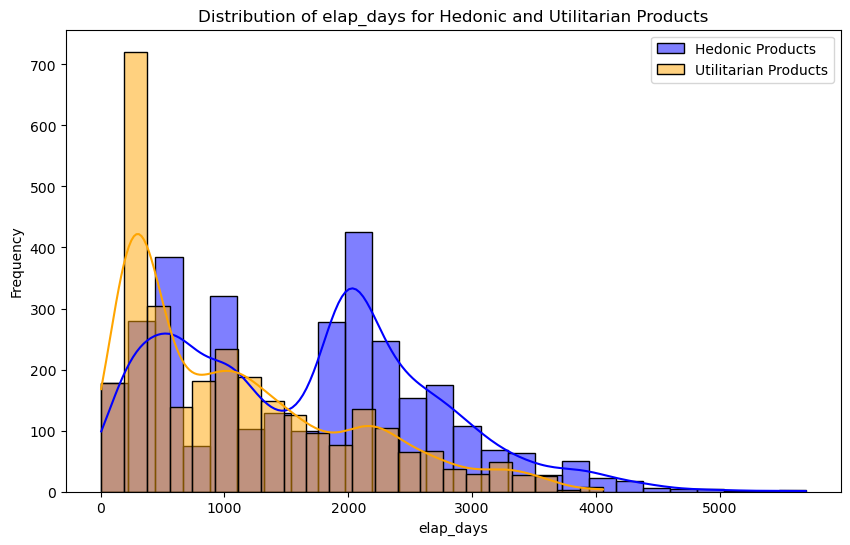

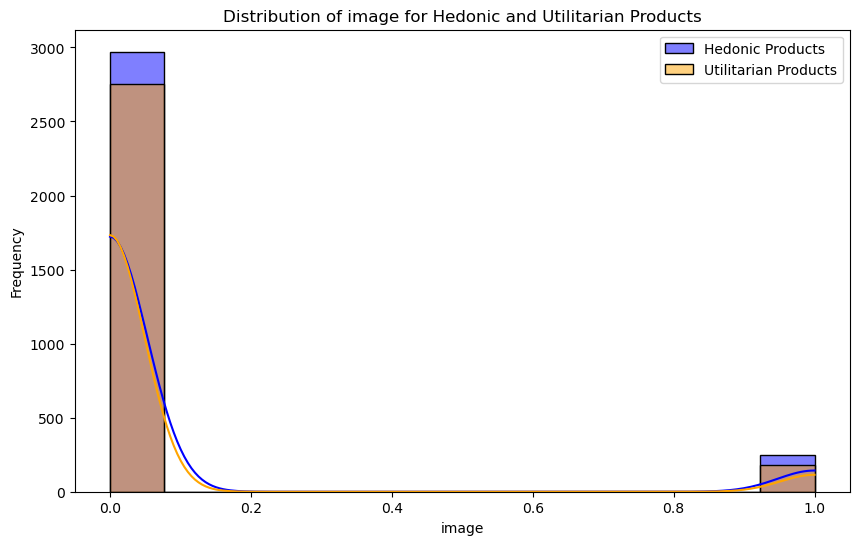

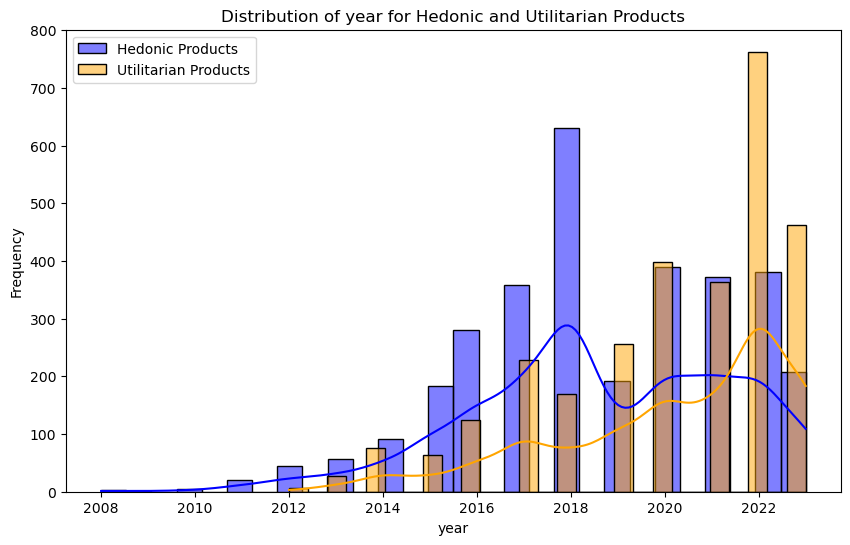

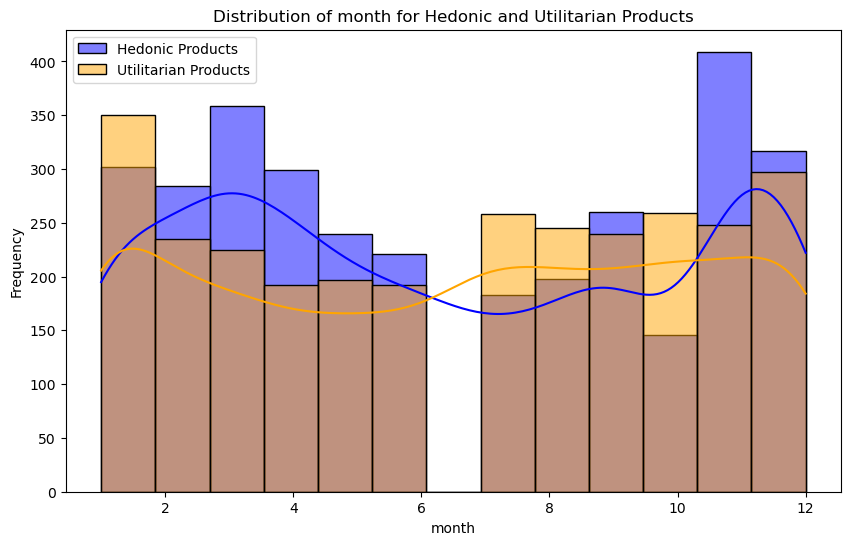

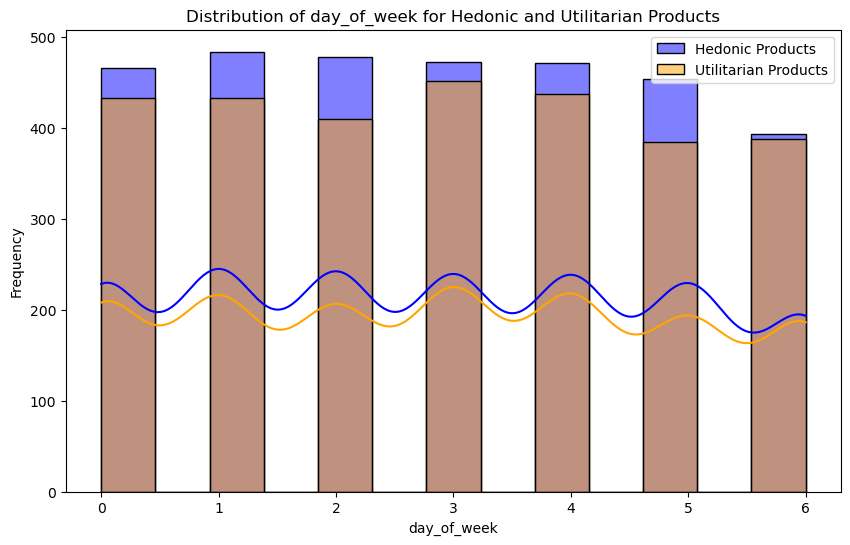

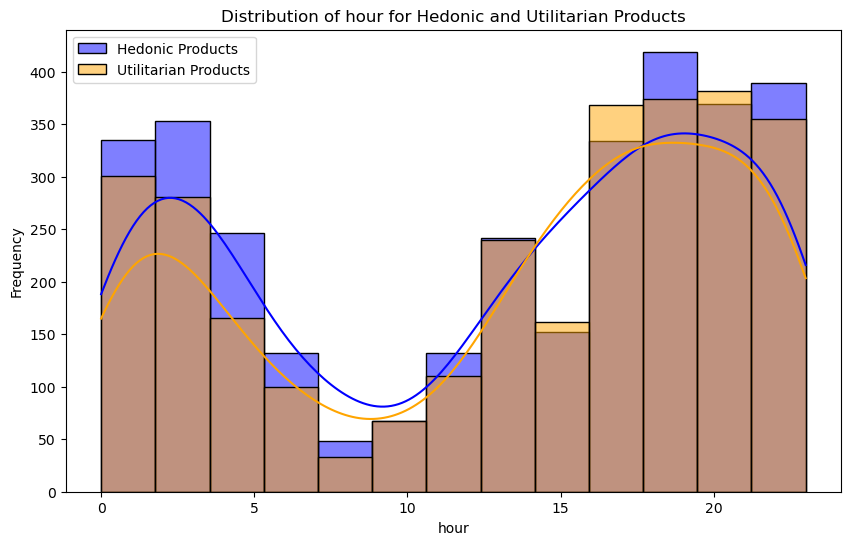

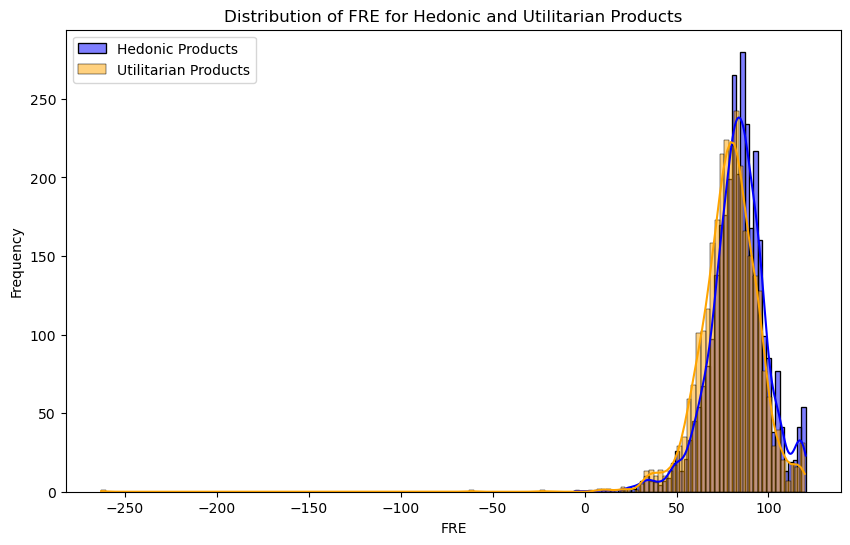

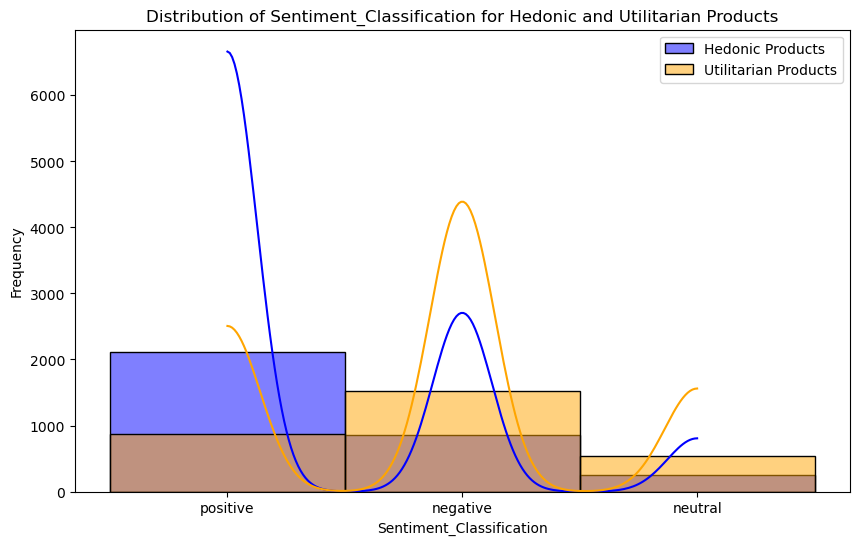

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day_of_week', 'hour','FRE','Sentiment_Classification'
]


# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(data_hedonic[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(data_utilitarian[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


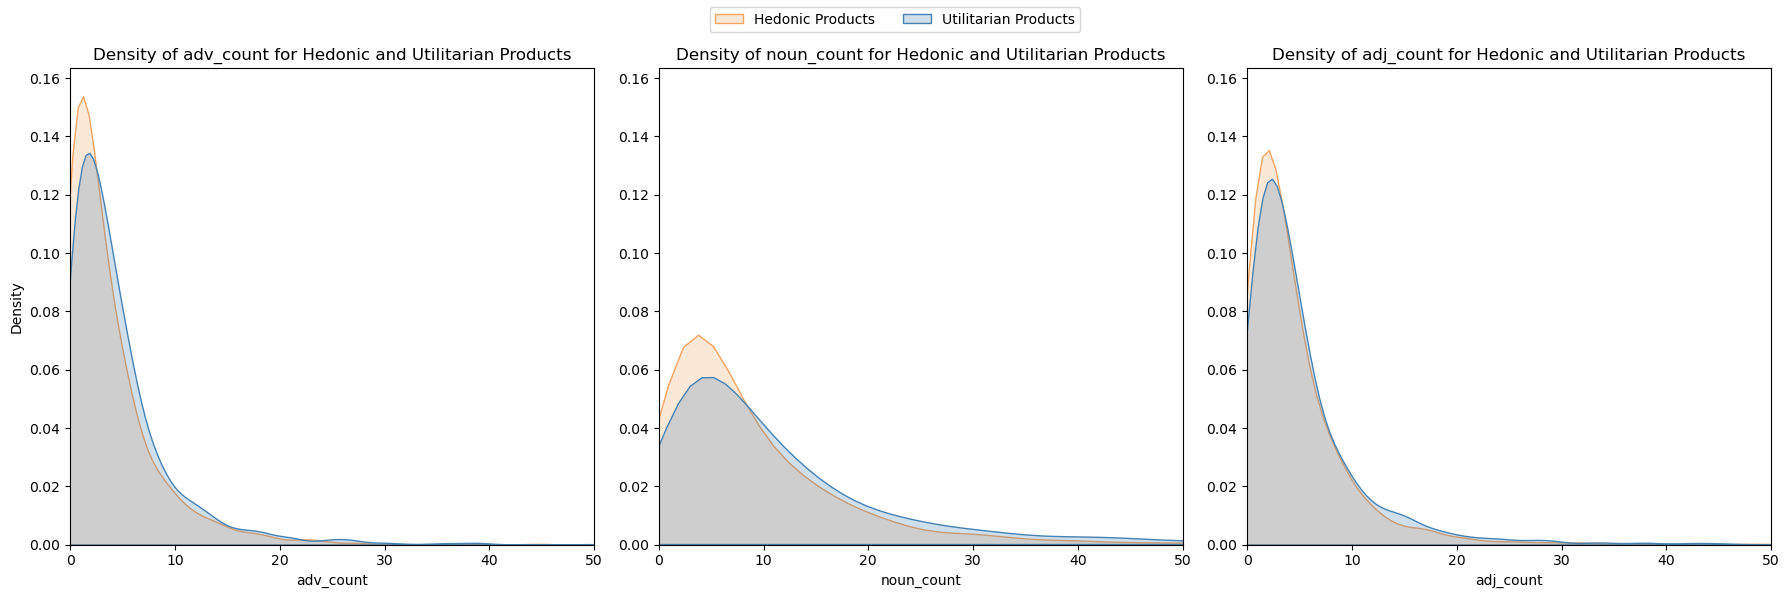

In [ ]:

from scipy.stats import gaussian_kde

# Define the features of interest
features = ['adv_count', 'noun_count', 'adj_count']

# Set up the grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the grid size and figure size
axes = axes.flatten()

# Find the overall x-axis and y-axis limits
x_min, x_max = 0, 50
y_max = 0

# Determine the max y-axis value for proper scaling
for feature in features:
    data_combined = np.concatenate([data_hedonic[feature], data_utilitarian[feature]])
    kde = gaussian_kde(data_combined)
    y_vals = kde(np.linspace(x_min, x_max, 1000))
    combined_max_y = max(y_vals)
    if combined_max_y > y_max:
        y_max = combined_max_y

# Plot the density plots
for ax, feature in zip(axes, features):
    sns.kdeplot(data=data_hedonic[feature], color='sandybrown', label='Hedonic Products', ax=ax, fill=True)
    sns.kdeplot(data=data_utilitarian[feature], color='steelblue', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_title(f'Density of {feature} for Hedonic and Utilitarian Products')
    ax.set_xlabel(feature)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max * 1.1)  # Adjusted to provide some extra space above the maximum density
    if ax == axes[0]:  # Label Y-axis only for the leftmost plot
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')
    
    # Remove individual legends
    ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the legend
plt.show()


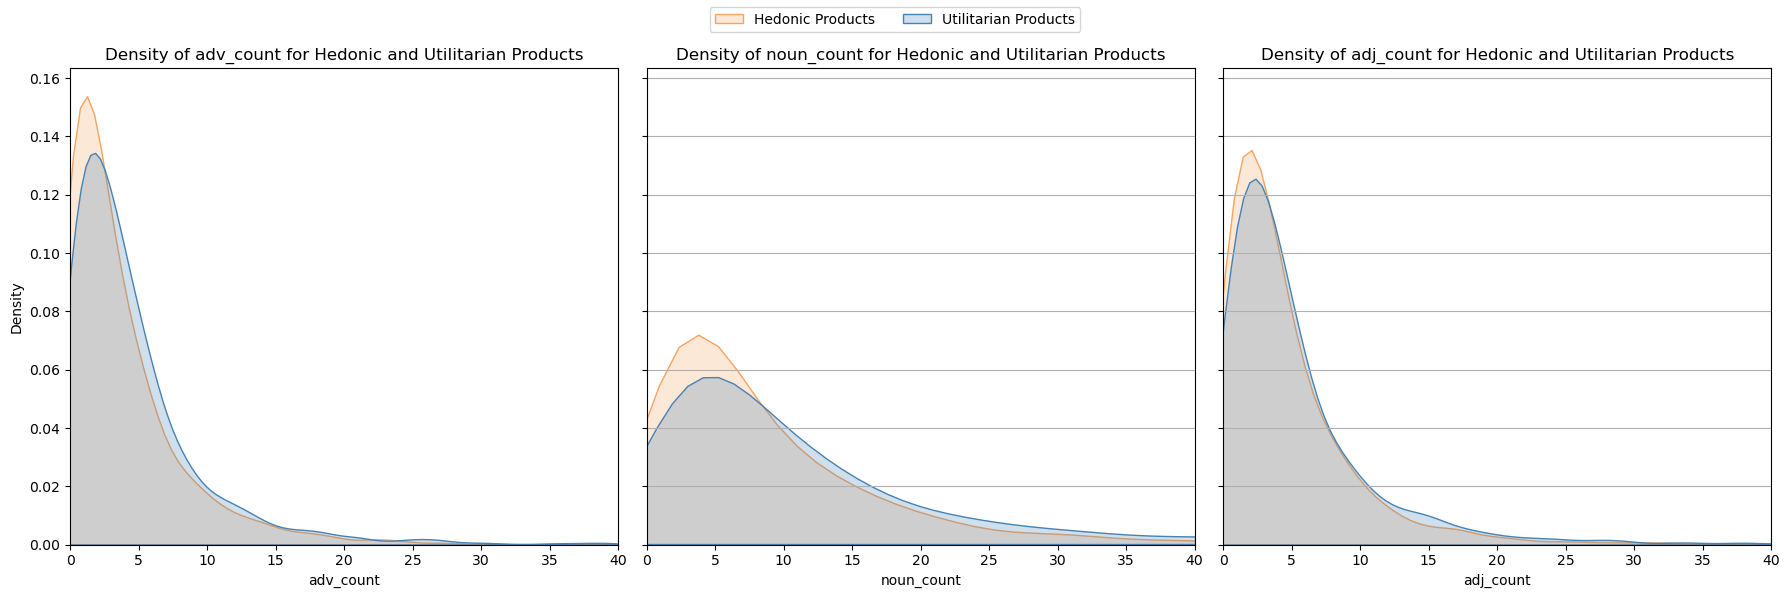

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the features of interest
features = ['adv_count', 'noun_count', 'adj_count']

# Set up the grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the grid size and figure size
axes = axes.flatten()

# Find the overall x-axis and y-axis limits
x_min, x_max = 0, 40
y_max = 0

# Determine the max y-axis value for proper scaling
for feature in features:
    data_combined = np.concatenate([data_hedonic[feature], data_utilitarian[feature]])
    kde = gaussian_kde(data_combined)
    y_vals = kde(np.linspace(x_min, x_max, 1000))
    combined_max_y = max(y_vals)
    if combined_max_y > y_max:
        y_max = combined_max_y

# Plot the density plots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=data_hedonic[feature], color='sandybrown', label='Hedonic Products', ax=ax, fill=True)
    sns.kdeplot(data=data_utilitarian[feature], color='steelblue', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_title(f'Density of {feature} for Hedonic and Utilitarian Products')
    ax.set_xlabel(feature)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max * 1.1)  # Adjusted to provide some extra space above the maximum density
    
    if i == 0:  # Set y-axis label only for the leftmost plot
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')  # Remove y-axis label for other plots
        ax.set_yticklabels([])  # Hide y-axis labels for other plots
        ax.yaxis.grid(True)  # Show y-axis grid for other plots
    
    # Remove individual legends
    ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the legend
plt.show()


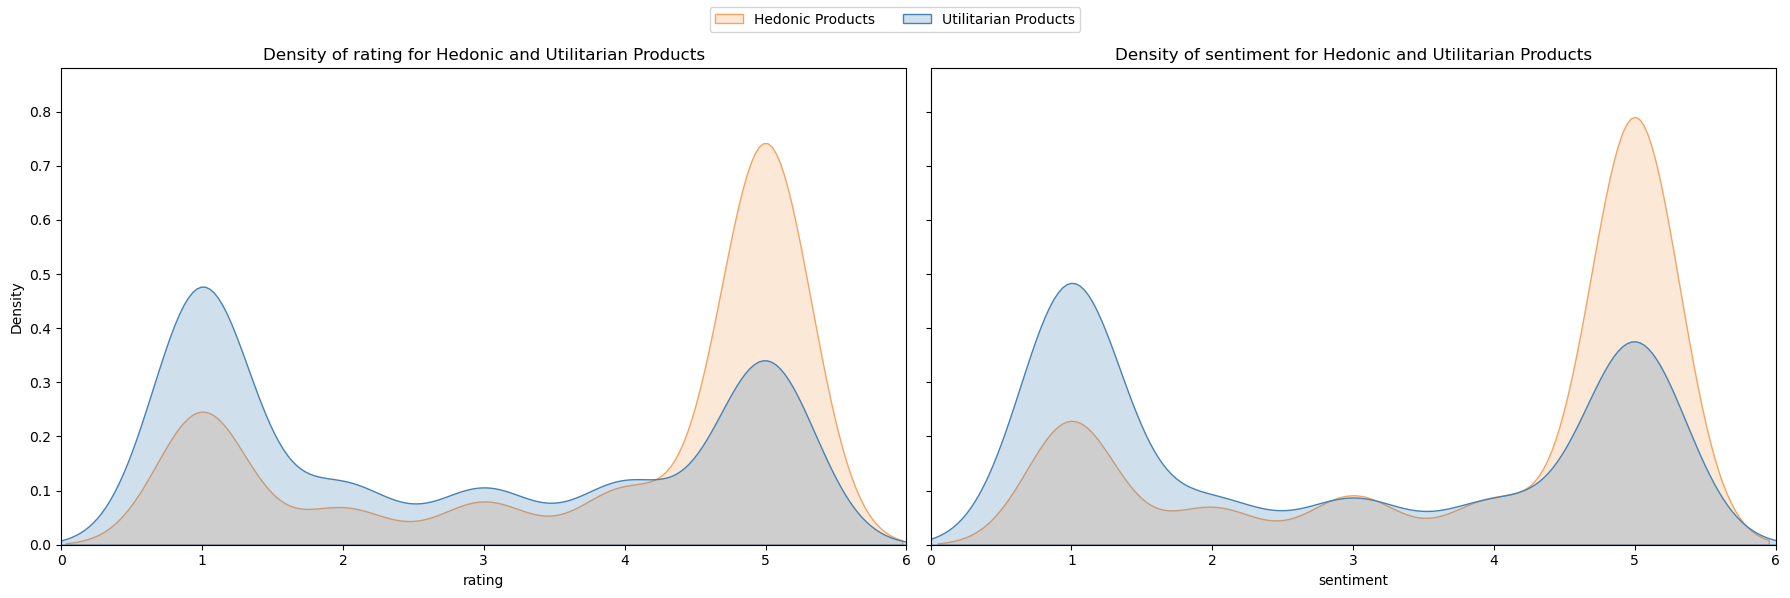

In [ ]:
# Define the features of interest
features = ['rating', 'sentiment']

# Set up the grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the grid size and figure size
axes = axes.flatten()

# Find the overall x-axis and y-axis limits
x_min, x_max = 0, 6
y_max = 0.8

# Determine the max y-axis value for proper scaling
for feature in features:
    data_combined = np.concatenate([data_hedonic[feature], data_utilitarian[feature]])
    kde = gaussian_kde(data_combined)
    y_vals = kde(np.linspace(x_min, x_max, 1000))
    combined_max_y = max(y_vals)
    if combined_max_y > y_max:
        y_max = combined_max_y

# Plot the density plots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=data_hedonic[feature], color='sandybrown', label='Hedonic Products', ax=ax, fill=True)
    sns.kdeplot(data=data_utilitarian[feature], color='steelblue', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_title(f'Density of {feature} for Hedonic and Utilitarian Products')
    ax.set_xlabel(feature)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max * 1.1)  # Adjusted to provide some extra space above the maximum density
    
    if i == 0:  # Set y-axis label only for the leftmost plot
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')  # Remove y-axis label for other plots
        ax.set_yticklabels([])  # Hide y-axis labels for other plots
    
    # Remove individual legends
    ax.legend().set_visible(False)
    ax.xaxis.grid(False)  # Show y-axis grid for other plots

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the legend
plt.show()

KeyError: 'Sentiment Numerical'

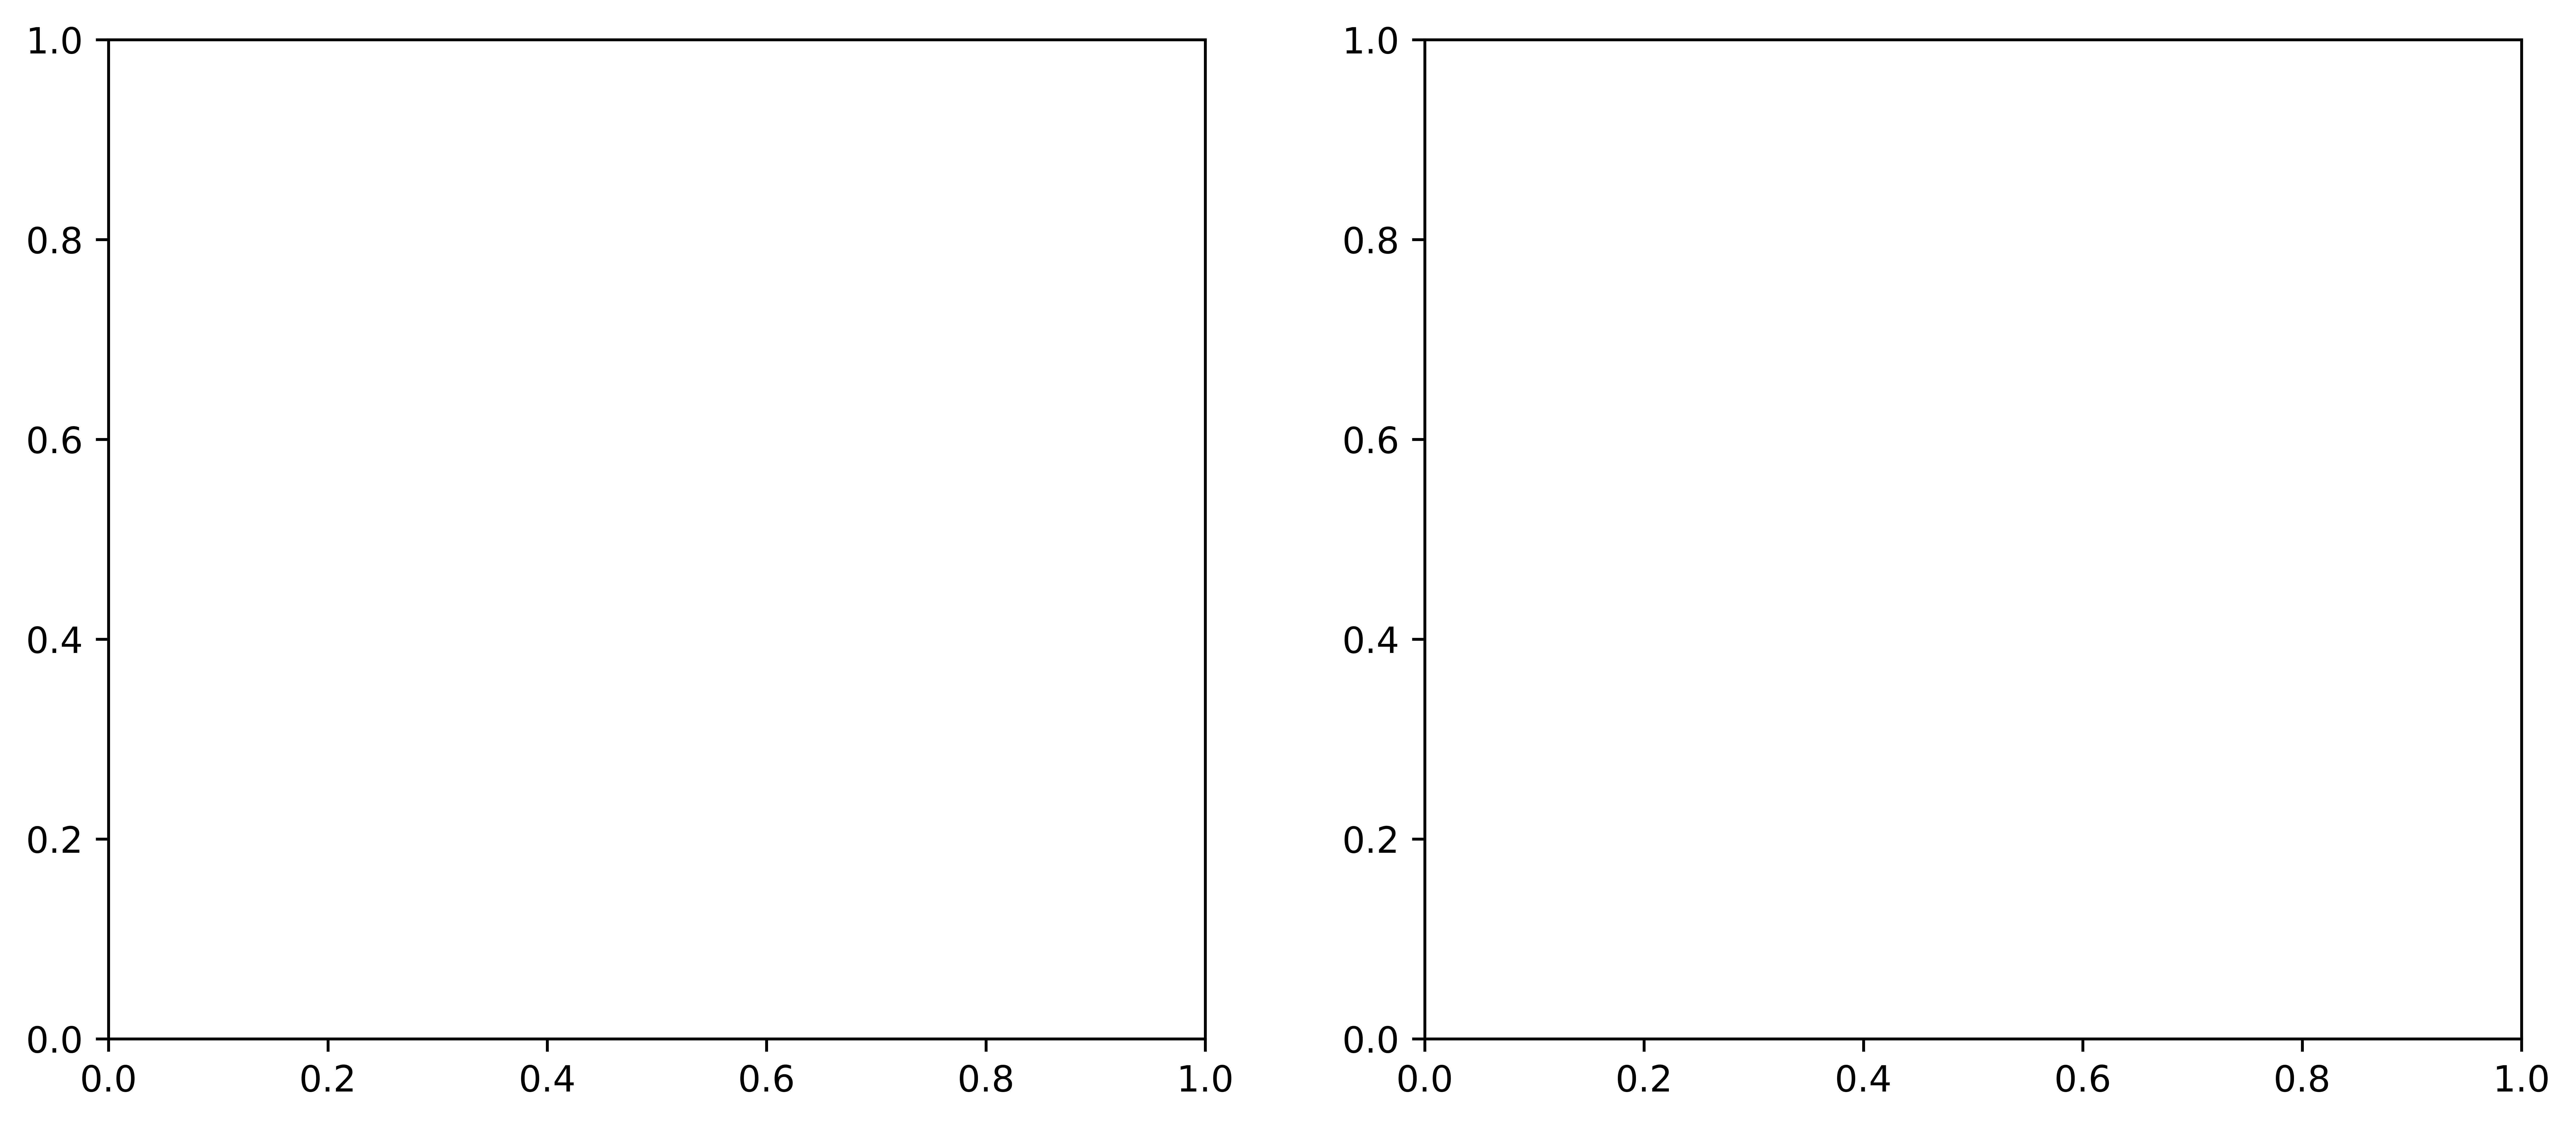

In [ ]:
from scipy.stats import gaussian_kde

# Define the features of interest
features = ['rating', 'Sentiment Numerical']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=1000)

# Define the range for rating
x_range_rating = np.linspace(0, 6, 1000)
# Define the range for Sentiment Numerical
x_range_sentiment = np.linspace(-1, 3, 1000)

# Plot for 'Sentiment Numerical'
ax = axes[0]

# Plot KDE for hedonic products for Sentiment Numerical
hedonic_kde_sentiment = gaussian_kde(data_hedonic['Sentiment Numerical'])
hedonic_density_sentiment = hedonic_kde_sentiment(x_range_sentiment)
ax.plot(x_range_sentiment, hedonic_density_sentiment, color='sandybrown', label='Hedonic Products')
ax.fill_between(x_range_sentiment, hedonic_density_sentiment, color='sandybrown', alpha=0.6)

# Plot KDE for utilitarian products for Sentiment Numerical
utilitarian_kde_sentiment = gaussian_kde(data_utilitarian['Sentiment Numerical'])
utilitarian_density_sentiment = utilitarian_kde_sentiment(x_range_sentiment)
ax.plot(x_range_sentiment, utilitarian_density_sentiment, color='steelblue', label='Utilitarian Products')
ax.fill_between(x_range_sentiment, utilitarian_density_sentiment, color='steelblue', alpha=0.5)

# Set properties for Sentiment Numerical plot
ax.set_xlabel('Sentiment')
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0,1.6)
ax.set_ylabel('')  # Remove y-axis label for the right plot
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Density')  # Show y-axis label only for the left plot

# Add horizontal gridlines for the y-axis manually
for y in np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)[1:-1]:
    ax.axhline(y=y, color='grey', linestyle='-', linewidth=0.3)

ax.yaxis.grid(False)
ax.xaxis.grid(False)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot for 'rating'
ax = axes[1]

# Plot KDE for hedonic products for rating
hedonic_kde_rating = gaussian_kde(data_hedonic['rating'])
hedonic_density_rating = hedonic_kde_rating(x_range_rating)
ax.plot(x_range_rating, hedonic_density_rating, color='sandybrown', label='Hedonic Products')
ax.fill_between(x_range_rating, hedonic_density_rating, color='sandybrown', alpha=0.6)

# Plot KDE for utilitarian products for rating
utilitarian_kde_rating = gaussian_kde(data_utilitarian['rating'])
utilitarian_density_rating = utilitarian_kde_rating(x_range_rating)
ax.plot(x_range_rating, utilitarian_density_rating, color='steelblue', label='Utilitarian Products')
ax.fill_between(x_range_rating, utilitarian_density_rating, color='steelblue', alpha=0.5)

# Set properties for rating plot
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.set_xlabel('Rating')
ax.set_xlim(0.1, 5.9)  # Limit x-axis to 5.5
ax.set_ylim(0, max(np.max(hedonic_density_rating), np.max(utilitarian_density_rating), np.max(hedonic_density_sentiment), np.max(utilitarian_density_sentiment)) * 1.1)
ax.legend(loc='upper right', title='Product Type', title_fontsize='medium')
ax.yaxis.set_visible(False)

axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


# Add horizontal gridlines for the y-axis manually
for y in np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)[1:-1]:
    ax.axhline(y=y, color='grey', linestyle='-', linewidth=0.3)

# Add gridlines for the x-axis

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Adding the 'helpful' column to the data dictionary
data['helpful'] = [votes >= 1 for votes in data['helpful_vote']]

# Creating the DataFrame with the updated data dictionary
data = pd.DataFrame(data)


# Display the updated DataFrame
print(data)

       rating                                            title_x  \
0         5.0                                          Love this   
1         5.0  The fun games that you remember.. now on the N...   
2         5.0                                      So much fun!!   
3         5.0                              Wish this had more...   
4         5.0    It is the physical copy and it is a good price.   
...       ...                                                ...   
18296     5.0                                  Really cool mouse   
18297     3.0                         the clicks are not durable   
18298     5.0                                        Great mouse   
18299     1.0                 Double click issues after 3 months   
18300     1.0  Cable stopped working only 4 months after purc...   

                                                    text images        asin  \
0      My kids have so much fun with this game. Its a...     []  B01N1081RO   
1      These are 3 of the

In [ ]:
# Apply log transformation to the 'word_count' and 'sent_length' columns
data['log_word_count'] = np.log1p(data['word_count'])
data['log_sent_length'] = np.log1p(data['sent_length'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=1000)
# Increase the font size of the x-axis and y-axis labels in the left plot
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot violin plot for log-transformed word_count
sns.violinplot(ax=axes[0], x="helpful_label", y="log_word_count", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[0].set_ylabel("log (word_count)", size=12)
axes[0].set_xlabel("")
axes[0].legend_.remove()  # Remove legend from the first plot



# Plot violin plot for log-transformed sent_length
sns.violinplot(ax=axes[1], x="helpful_label", y="log_sent_length", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[1].set_ylabel("log (sent_length)", size=12)
axes[1].set_xlabel("")

axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='12', fontsize='12', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


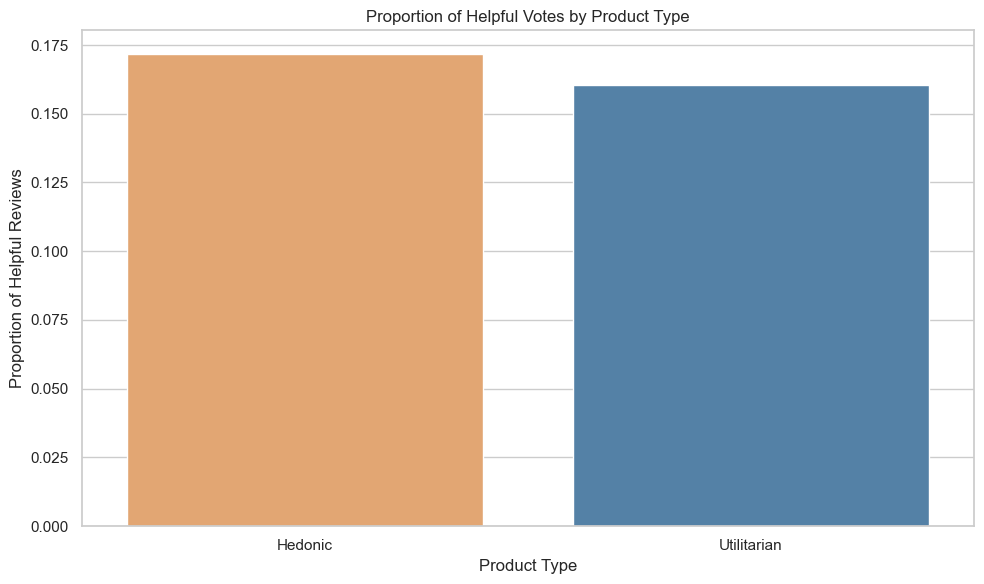

In [ ]:
# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data['helpful_label'] = data['helpful'].map({True: 'Helpful', False: 'Not Helpful'})

# Calculate the proportion of helpful reviews for each product type
helpful_proportion = data.groupby('prod_type_label')['helpful'].mean().reset_index()

# Set the theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("Proportion of Helpful Reviews")
plt.xlabel("Product Type")
plt.title("Proportion of Helpful Votes by Product Type")
plt.tight_layout()
plt.show()

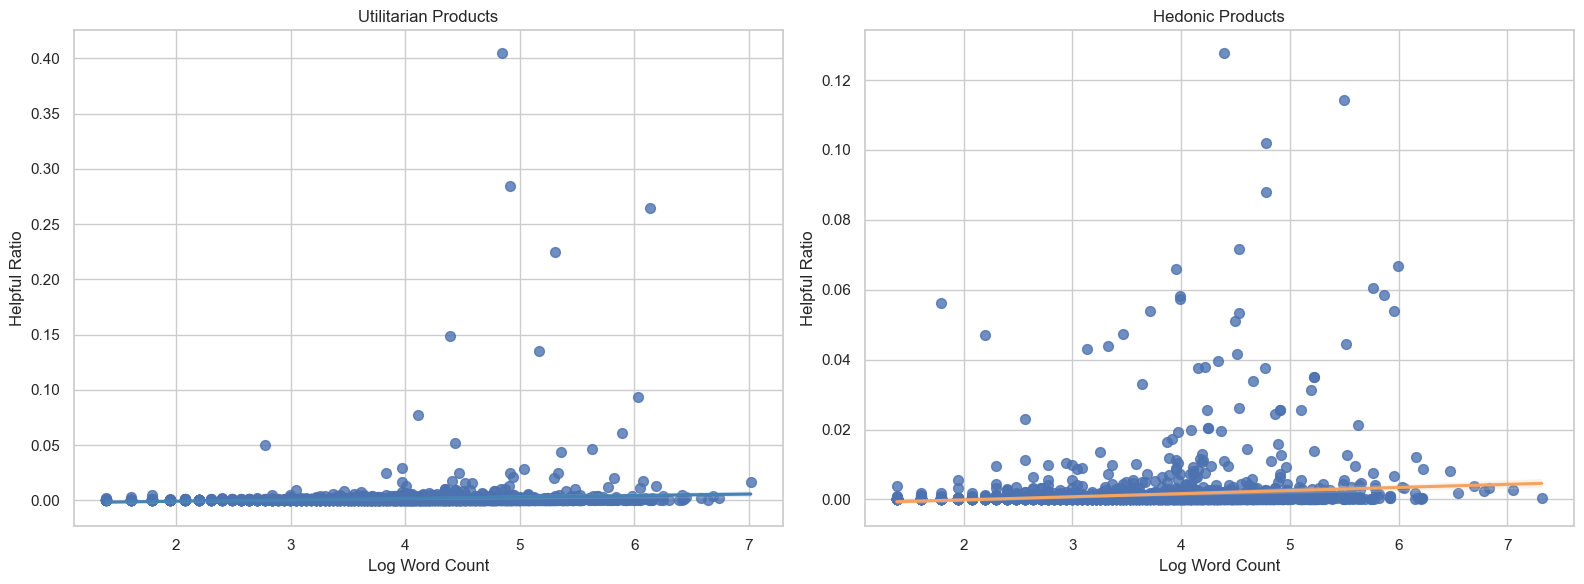

In [ ]:
# Log-transform the word_count
data_helpful['log_word_count'] = np.log1p(data_helpful['word_count'])

# Map product types to labels
data_helpful['prod_type_label'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for Utilitarian products
sns.regplot(ax=axes[0], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 0], scatter_kws={'s': 50}, line_kws={'color': 'steelblue'})
axes[0].set_title('Utilitarian Products')
axes[0].set_xlabel('Log Word Count')
axes[0].set_ylabel('Helpful Ratio')

# Scatter plot with regression line for Hedonic products
sns.regplot(ax=axes[1], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 1], scatter_kws={'s': 50}, line_kws={'color': 'sandybrown'})
axes[1].set_title('Hedonic Products')
axes[1].set_xlabel('Log Word Count')
axes[1].set_ylabel('Helpful Ratio')

plt.tight_layout()
plt.show()

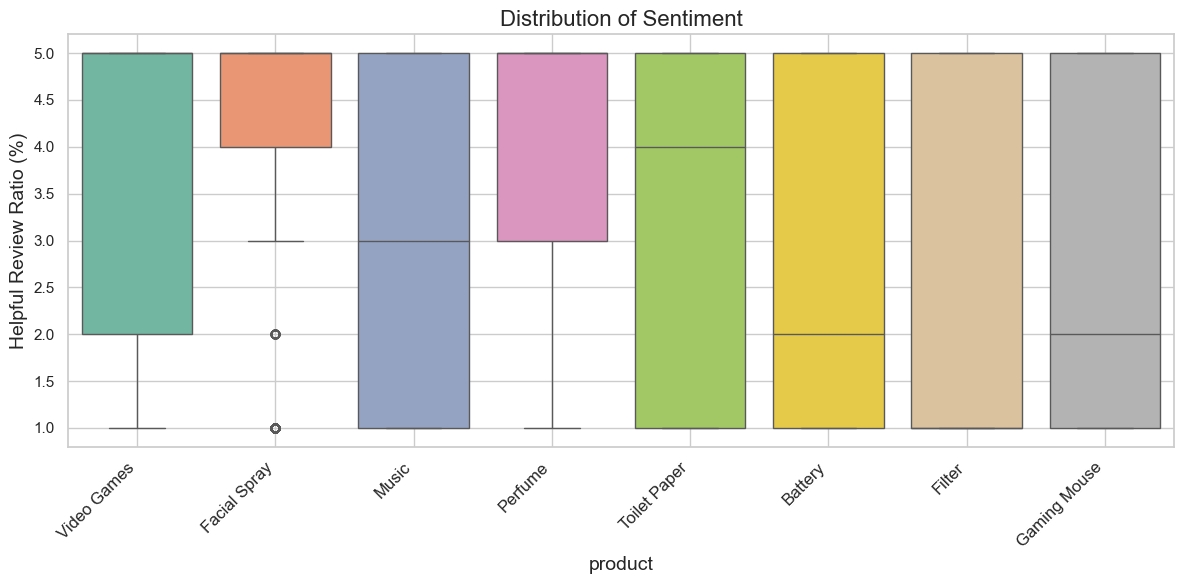

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot for hedonic products
plt.figure(figsize=(12, 6))
sns.boxplot(x='product', y='sentiment', data=data_helpful, palette='Set2')
plt.title('Distribution of Sentiment', fontsize=16)
plt.xlabel('product', fontsize=14)
plt.ylabel('Helpful Review Ratio (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


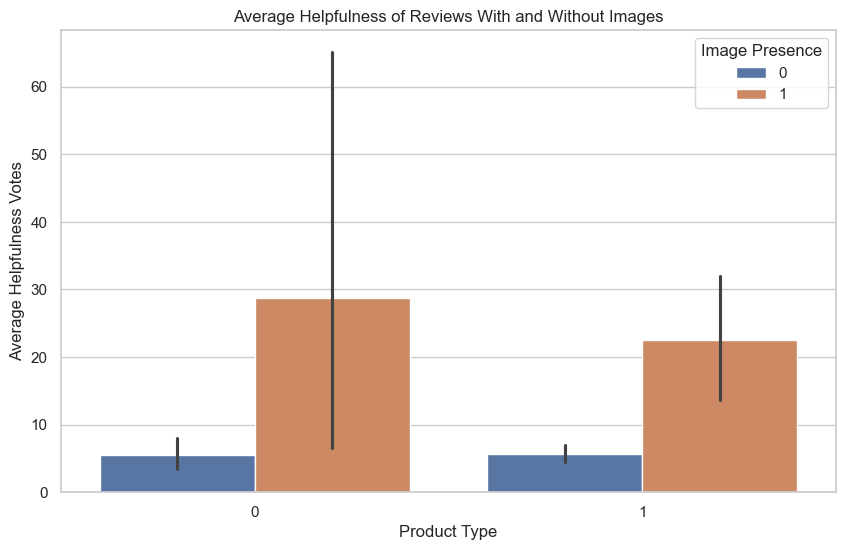

In [ ]:
# Calculate average helpfulness for reviews with and without images
avg_helpfulness = data_helpful.groupby(['prod_type', 'image'])['helpful_vote'].mean

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data_helpful, x='prod_type', y='helpful_vote', hue='image')
plt.title('Average Helpfulness of Reviews With and Without Images')
plt.xlabel('Product Type')
plt.ylabel('Average Helpfulness Votes')
plt.legend(title='Image Presence')
plt.show()

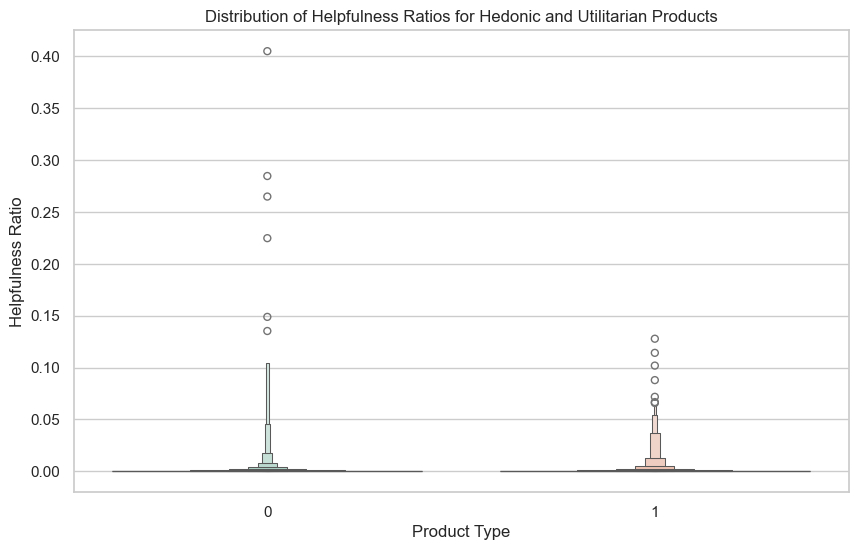

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data_helpful, x='prod_type', y='helpful_ratio', palette='Set2')
plt.title('Distribution of Helpfulness Ratios for Hedonic and Utilitarian Products')
plt.xlabel('Product Type')
plt.ylabel('Helpfulness Ratio')
plt.show()


## Analyzing n_Grams by sentiment 

In [ ]:
word_counts = {}
for text in data_hedonic['text_cleaned1']:
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()  # Split the text into words
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1



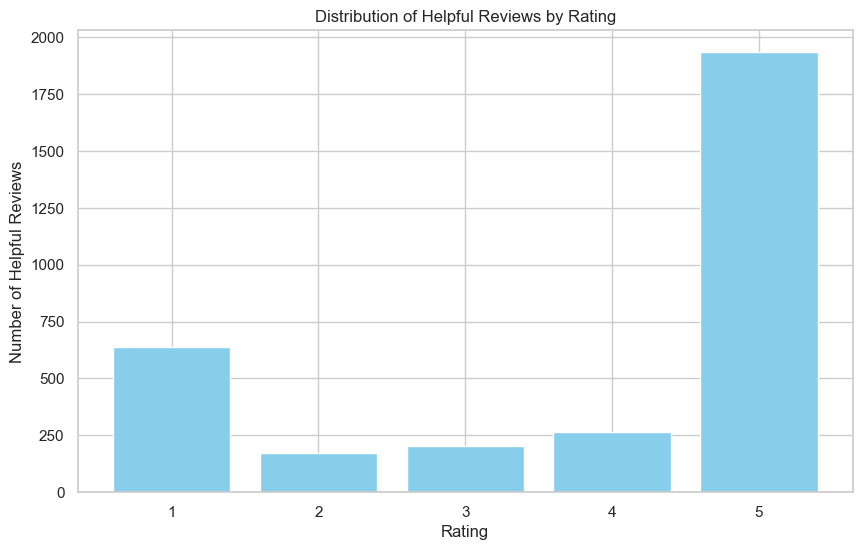

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate counts for each rating with at least 1 helpful vote
helpful_reviews_count_by_rating = data_hedonic['rating'][data_hedonic['helpful_vote'] > 0].value_counts()

# Plot a bar chart to visualize the distribution of helpful reviews by rating
plt.figure(figsize=(10, 6))
plt.bar(helpful_reviews_count_by_rating.index, helpful_reviews_count_by_rating.values, color='skyblue')
plt.title('Distribution of Helpful Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Helpful Reviews')
plt.xticks(helpful_reviews_count_by_rating.index)  # Ensure all ratings are displayed on x-axis
plt.grid(True)
plt.show()


In [ ]:
word_counts_positive = {}
word_counts_negative = {}
word_counts_neutral = {}

for index, row in data_hedonic.iterrows():
    text = row['text_cleaned1']
    sentiment = row['Sentiment_Classification']
    
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()  # Split the text into words
        
        # Count words based on sentiment classification
        if sentiment == 'positive':
            for word in words:
                if word in word_counts_positive:
                    word_counts_positive[word] += 1
                else:
                    word_counts_positive[word] = 1
        elif sentiment == 'negative':
            for word in words:
                if word in word_counts_negative:
                    word_counts_negative[word] += 1
                else:
                    word_counts_negative[word] = 1
        elif sentiment == 'neutral':
            for word in words:
                if word in word_counts_neutral:
                    word_counts_neutral[word] += 1
                else:
                    word_counts_neutral[word] = 1


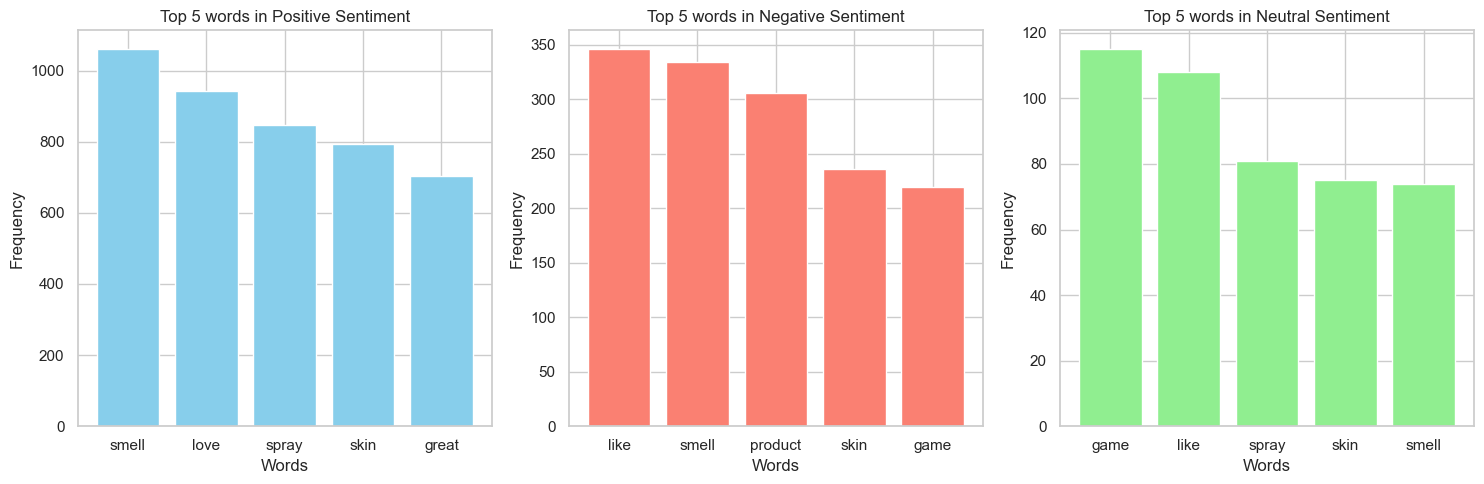

In [ ]:
import matplotlib.pyplot as plt

# Sort the word counts for each sentiment category
top_words_positive = sorted(word_counts_positive.items(), key=lambda x: x[1], reverse=True)[:5]
top_words_negative = sorted(word_counts_negative.items(), key=lambda x: x[1], reverse=True)[:5]
top_words_neutral = sorted(word_counts_neutral.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract words and counts for plotting
words_positive, counts_positive = zip(*top_words_positive)
words_negative, counts_negative = zip(*top_words_negative)
words_neutral, counts_neutral = zip(*top_words_neutral)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(words_positive, counts_positive, color='skyblue')
plt.title('Top 5 words in Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(132)
plt.bar(words_negative, counts_negative, color='salmon')
plt.title('Top 5 words in Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(133)
plt.bar(words_neutral, counts_neutral, color='lightgreen')
plt.title('Top 5 words in Neutral Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
def classify_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to the sentiment column
data['Sentiment_Classification2'] = data['sentiment'].apply(classify_sentiment)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

def plot_top_bigrams_by_product(data, text_column, sentiment_column, product_column):
    unique_products = data[product_column].unique()
    
    for product in unique_products:
        # Filter data for the current product
        product_data = data[data[product_column] == product]
        
        # Drop rows with missing values in the text column
        product_data = product_data.dropna(subset=[text_column])

        # Initialize CountVectorizer for bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))

        # Fit and transform the review text data
        X = vectorizer.fit_transform(product_data[text_column])

        # Get feature names (bigrams)
        feature_names = vectorizer.get_feature_names_out()

        # Initialize bigram counts for each sentiment category
        bigram_counts = defaultdict(lambda: defaultdict(int))

        # Iterate over each review text for the current product
        for index, sentiment in enumerate(product_data[sentiment_column]):
            # Get the indices of bigrams in the current review
            bigram_indices = X[index].indices
            # Increment bigram counts for the corresponding sentiment
            for bigram_index in bigram_indices:
                bigram_counts[sentiment][feature_names[bigram_index]] += 1

        # Sort the bigram counts for each sentiment category
        top_bigrams_by_sentiment = {}
        for sentiment, counts in bigram_counts.items():
            top_bigrams_by_sentiment[sentiment] = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:3]

        # Plotting
        plt.figure(figsize=(15, 5))
        for i, (sentiment, top_bigrams) in enumerate(top_bigrams_by_sentiment.items()):
            bigrams, counts = zip(*top_bigrams)

            plt.subplot(1, 3, i+1)
            plt.bar(bigrams, counts, color='skyblue' if sentiment == 'positive' else 'salmon' if sentiment == 'negative' else 'lightgreen')
            plt.title(f'Top 5 bigrams in {sentiment.capitalize()} Sentiment for {product}')
            plt.xlabel('Bigrams')
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

def plot_top_bigrams_by_product(data, text_column, sentiment_column, product_column):
    unique_products = data[product_column].unique()
    
    for product in unique_products:
        # Filter data for the current product
        product_data = data[data[product_column] == product]
        
        # Drop rows with missing values in the text column
        product_data = product_data.dropna(subset=[text_column])

        # Initialize CountVectorizer for bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))

        # Fit and transform the review text data
        X = vectorizer.fit_transform(product_data[text_column])

        # Get feature names (bigrams)
        feature_names = vectorizer.get_feature_names_out()

        # Initialize bigram counts for each sentiment category
        bigram_counts = defaultdict(lambda: defaultdict(int))

        # Iterate over each review text for the current product
        for index, sentiment in enumerate(product_data[sentiment_column]):
            # Get the indices of bigrams in the current review
            bigram_indices = X[index].indices
            # Increment bigram counts for the corresponding sentiment
            for bigram_index in bigram_indices:
                bigram_counts[sentiment][feature_names[bigram_index]] += 1

        # Sort the bigram counts for each sentiment category
        top_bigrams_by_sentiment = {}
        for sentiment, counts in bigram_counts.items():
            # Sort bigrams by count
            sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
            # Select the fourth, fifth, and sixth most frequent bigrams
            top_bigrams_by_sentiment[sentiment] = sorted_counts[3:6]

        # Plotting
        plt.figure(figsize=(15, 5))
        for i, (sentiment, top_bigrams) in enumerate(top_bigrams_by_sentiment.items()):
            bigrams, counts = zip(*top_bigrams)

            plt.subplot(1, 3, i+1)
            plt.bar(bigrams, counts, color='skyblue' if sentiment == 'positive' else 'salmon' if sentiment == 'negative' else 'lightgreen')
            plt.title(f'Most frequent bigrams {sentiment.capitalize()} Sentiment for {product}')
            plt.xlabel('Bigrams')
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()



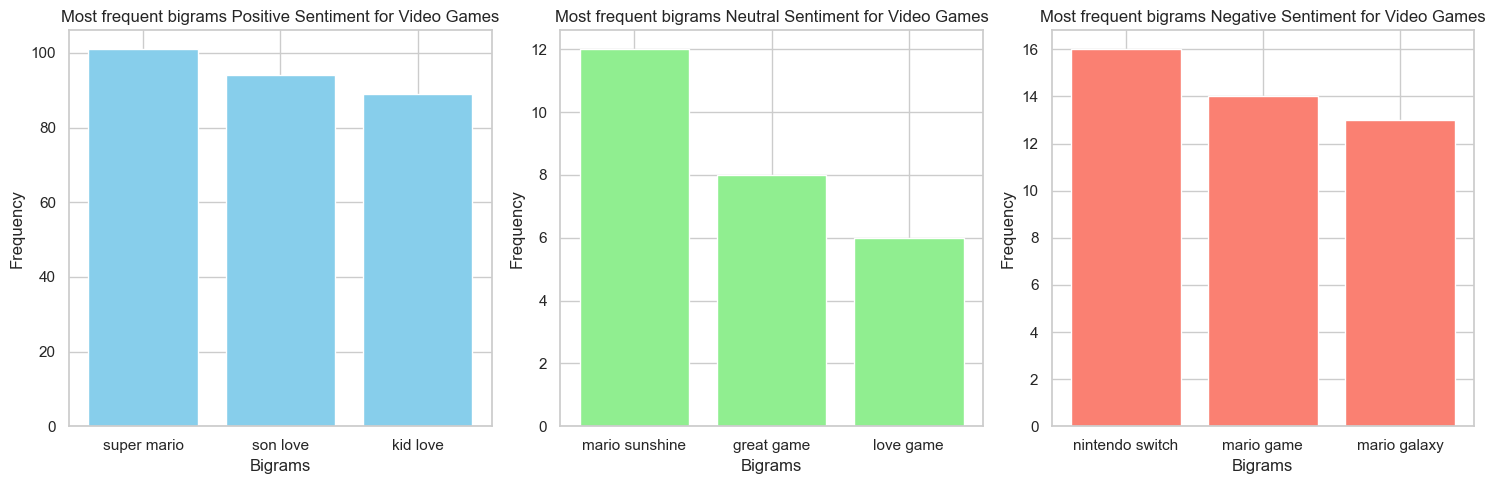

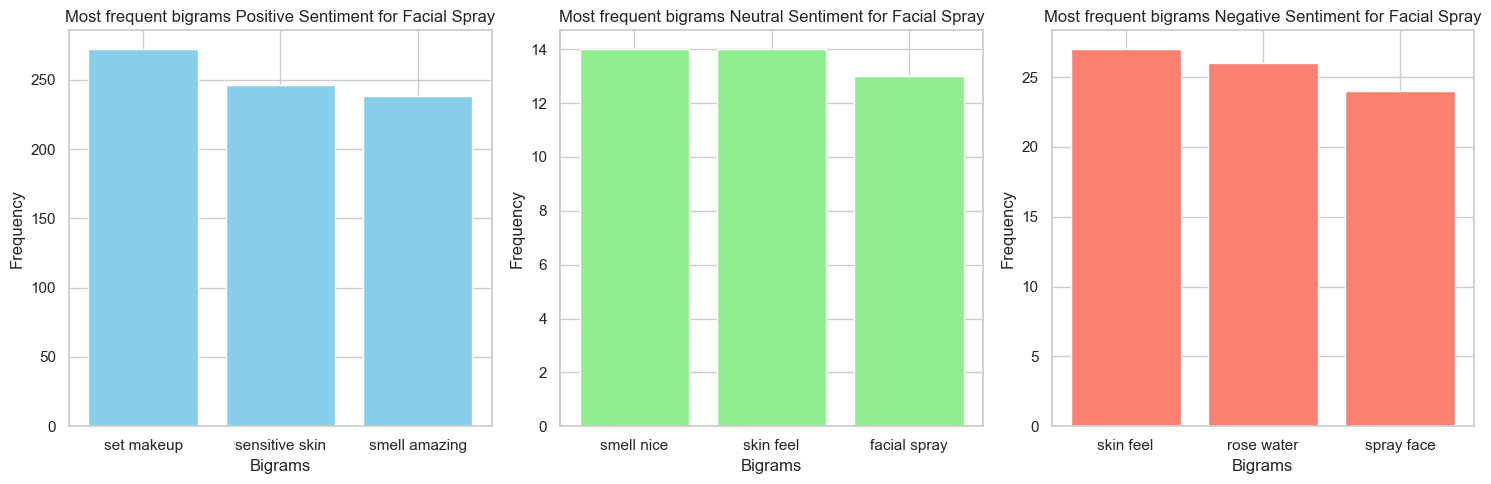

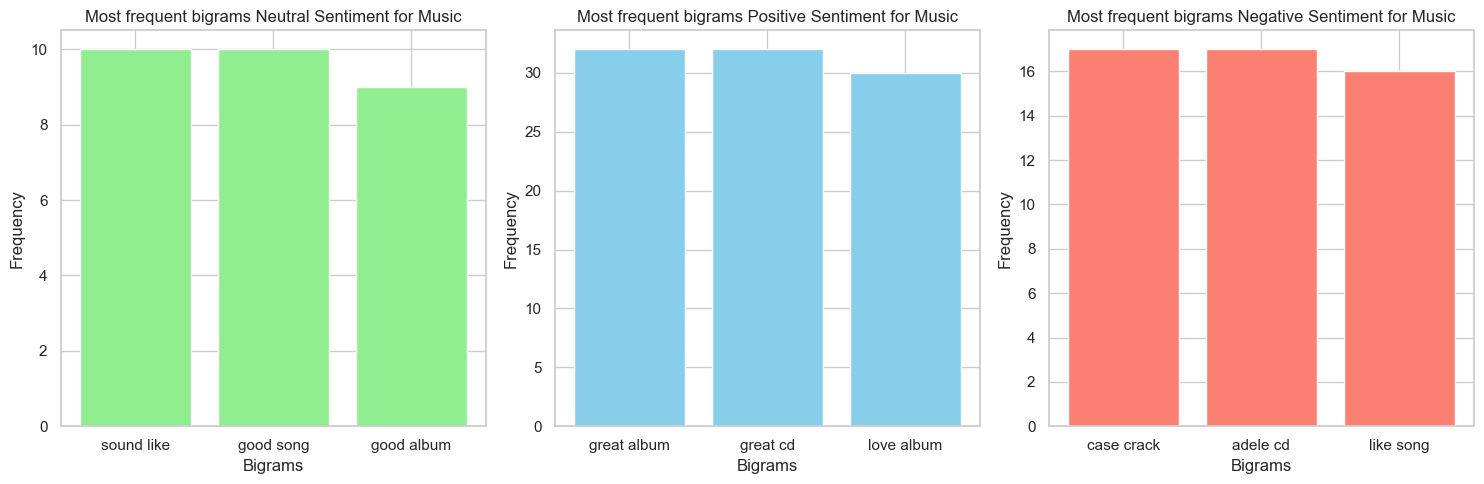

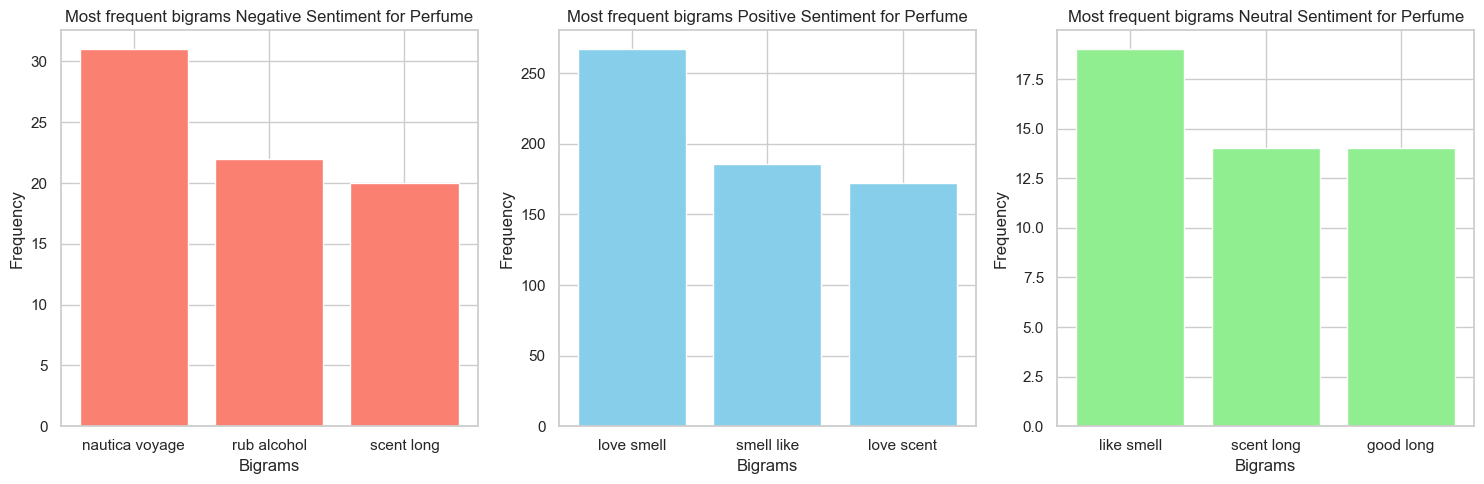

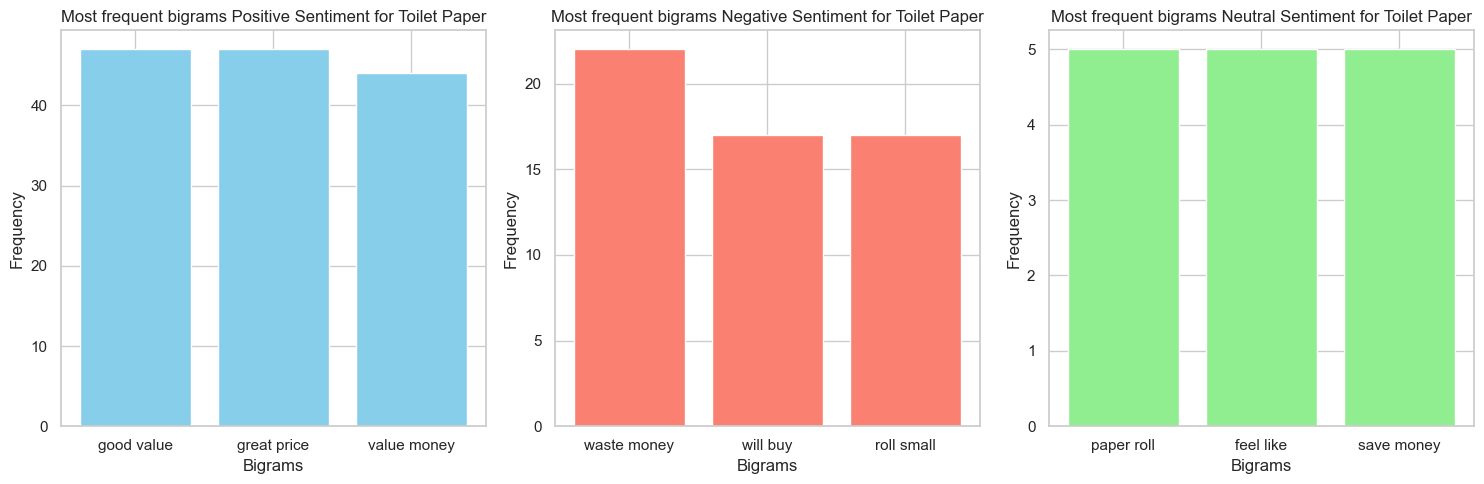

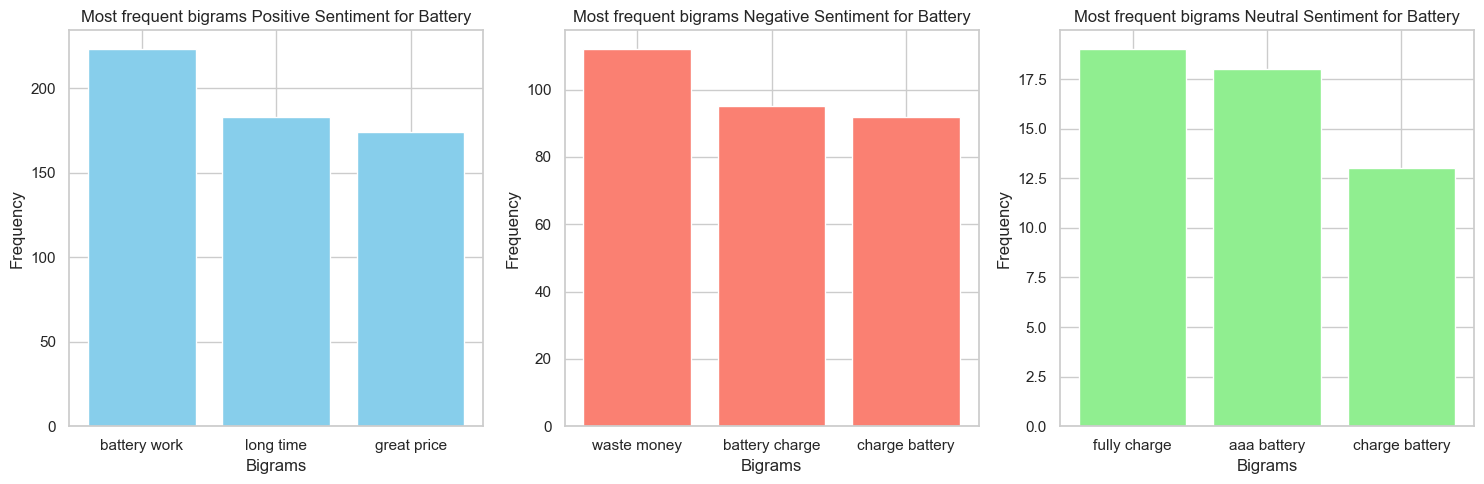

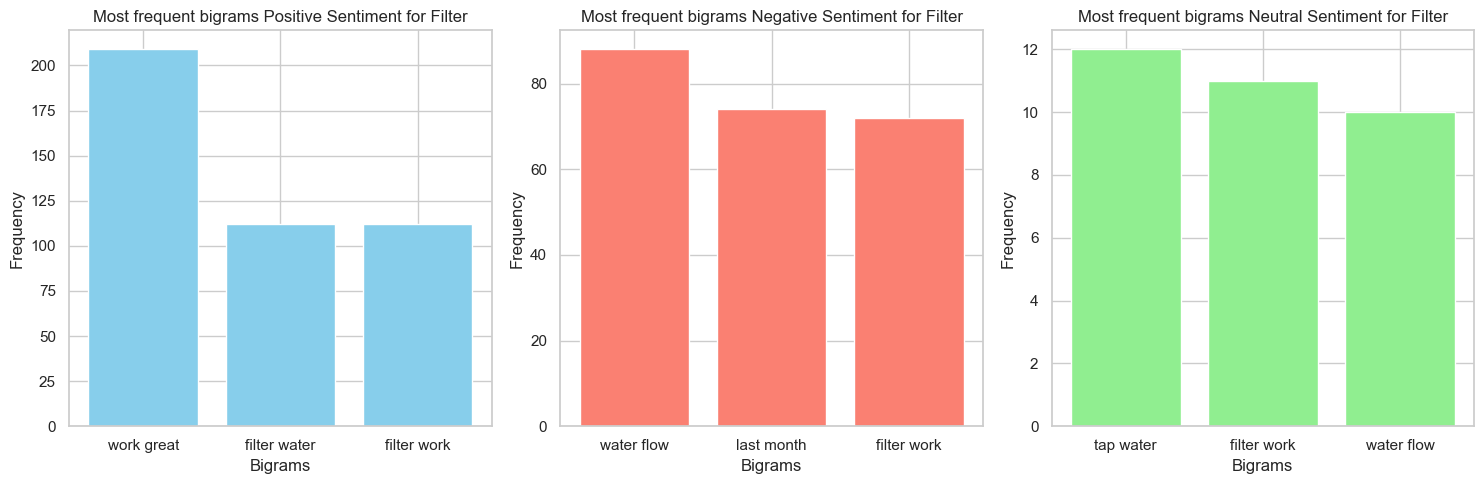

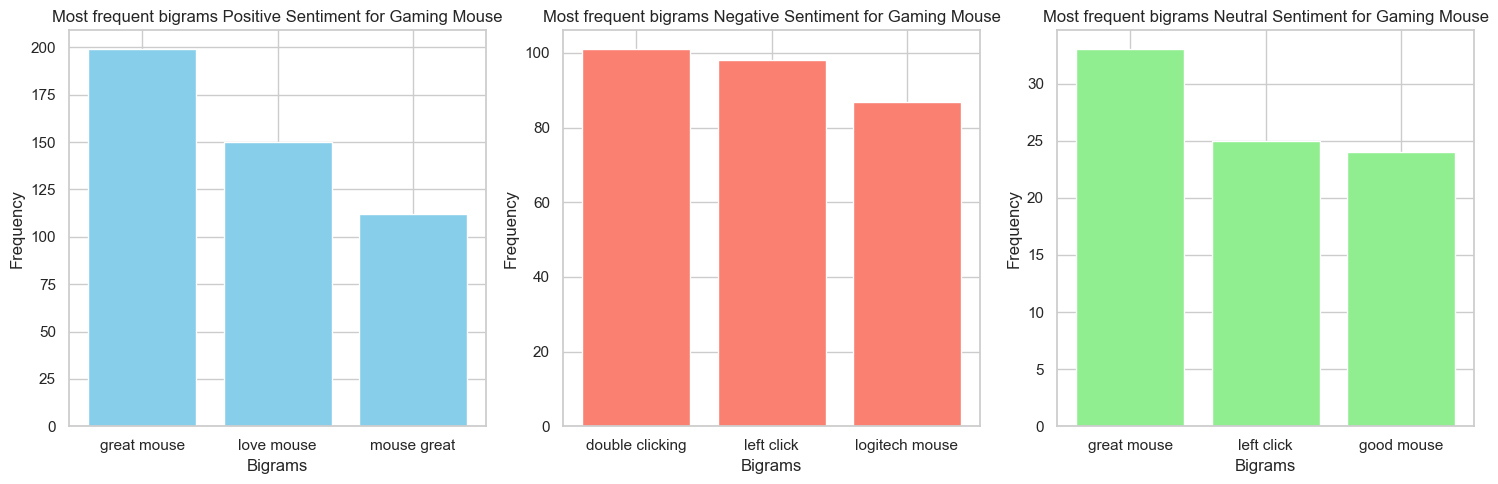

In [ ]:
plot_top_bigrams_by_product (data, sentiment_column='Sentiment_Classification2', text_column='text_cleaned1', product_column='product' )